In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


!git clone https://github.com/MaginnGroup/GCGP.git /content/drive/Shareddrives/GCCP/GCCP

In [ ]:
! ls /content/drive/Shareddrives/GCCP/GCCP/

ls: cannot access '/content/drive/Shareddrives/GCCP/GCCP/': No such file or directory


! unzip /content/drive/Shareddrives/GCCP/GCCP/Raw_data_files.zip -d /content/drive/Shareddrives/GCCP/GCCP/

In [ ]:
! ls -ltr /content/drive/Shareddrives/GCCP/GCCP/Raw_data_files

ls: cannot access '/content/drive/Shareddrives/GCCP/GCCP/Raw_data_files': No such file or directory


Install all functions here

In [ ]:
! pip install rdkit
! pip install requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 38.0 MB/s eta 0:00:00


All imports will go here

In [ ]:
import pandas as pd
import pandas as pd
import requests
import time
from rdkit import Chem
import json

Load the Raw data

In [ ]:
dataDir = '/content/drive/Shareddrives/GCCP/GCCP/Raw_data_files/'

In [ ]:
! ls /content/drive/MyDrive/chemAIML/GCGP/Data_for_Model_Building

Hvap_data_test_fluorinated_molecules.csv  Tb_prediction_data_fcl.csv
Hvap_orig_prediction_data_fcl.csv	  Tc_prediction_data_fcl.csv
Hvap_prediction_data_fcl.csv		  Tm_prediction_data_fcl.csv
Pc_prediction_data_fcl.csv		  Vc_prediction_data_fcl.csv


In [ ]:
# Replace 'your_file.xls' with the path to your actual .xls file
file_path_animeonly = dataDir+'amines_results_07_31.csv'
file_path_wAllCompounds = dataDir+'result_organic_compounds.csv'      # this is new data

# Read the .csv file
rawDataDF_animeonly = pd.read_csv(file_path_animeonly)
rawDataDF_wAllCompounds = pd.read_csv(file_path_wAllCompounds)
rawDataDF = pd.concat([rawDataDF_animeonly, rawDataDF_wAllCompounds])
rawDataDF

,Unnamed: 0,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,EnthalpyForm,GibbsEnergy,HeatCapacity,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,-556.33,-300.04,199.3171306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,-556.33,-300.04,199.3171306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8895,4447.0,s1c2ccccc2cc1C(N(O)C(=O)N)C,776.9,583.06,1007.025666,40.98622699,599.5,-9.37,182.22,246.1879629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8897,4448.0,[S+2]([O-])([O-])(C)c1ccc(cc1)c1[nH0]c2[nH0](C...,Error,Error,Error,Error,Error,Error,Error,Error,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keep only relevant properties

In [ ]:
rawDataDF = rawDataDF[['SMILES', 'BoilingPoint', 'MeltingPoint','CriticalTemp', 'CriticalPress','CriticalVolume','Molecular Weight', 'Log P']]
rawDataDF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,Log P
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,149.190,-1.7347
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,149.190,-1.7347
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8895,s1c2ccccc2cc1C(N(O)C(=O)N)C,776.9,583.06,1007.025666,40.98622699,599.5,236.296,2.7322
8896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8897,[S+2]([O-])([O-])(C)c1ccc(cc1)c1[nH0]c2[nH0](C...,Error,Error,Error,Error,Error,272.329,2.4048
8898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rawDataDF = rawDataDF.dropna(how='all')
rawDataDF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,Log P
1,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,149.190,-1.73470
3,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,149.190,-1.73470
5,CN(C)c1ccc(C=O)cc1,Error,Error,Error,Error,Error,149.193,1.56510
7,Nc1ccc(cc1)[N+]([O-])=O,592.91,423.19,856.6495866,50.37070319,374.5,138.126,1.17700
9,NCCCCCCCC(O)=O,600.68,423.78,794.6595723,29.536862,536.5,159.229,1.37030
...,...,...,...,...,...,...,...,...
8891,O=C(OC)C1C(O)CCC2CN3CCc4c5ccccc5[nH]c4C3CC21,963.08,692.3,1195.306309,19.6655867,1000.5,354.450,2.64710
8893,O=C1NC(=O)C(C)=CN1C1OC(CO)C(N=[N+]=[N-])C1,Error,Error,Error,Error,Error,267.245,-0.19628
8895,s1c2ccccc2cc1C(N(O)C(=O)N)C,776.9,583.06,1007.025666,40.98622699,599.5,236.296,2.73220
8897,[S+2]([O-])([O-])(C)c1ccc(cc1)c1[nH0]c2[nH0](C...,Error,Error,Error,Error,Error,272.329,2.40480


In [ ]:
rawDataDF = rawDataDF[rawDataDF.apply(lambda row: (row == 'Error').sum() <= 1, axis=1)]
rawDataDF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,Log P
1,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,149.190,-1.73470
3,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,149.190,-1.73470
7,Nc1ccc(cc1)[N+]([O-])=O,592.91,423.19,856.6495866,50.37070319,374.5,138.126,1.17700
9,NCCCCCCCC(O)=O,600.68,423.78,794.6595723,29.536862,536.5,159.229,1.37030
11,NCc1ccccc1,458.97,278.33,685.6948212,44.32616254,348.5,107.156,1.14530
...,...,...,...,...,...,...,...,...
8887,O=C(O)C(C)c1ccc(cc1)C1CCCC(=NO)C1,910.42,NaN,1144.225141,23.20306206,NaN,261.321,3.36250
8889,N=1CCNC=1Cc1c(C)cc(cc1C)C(C)(C)C,730.41,541.47,972.8976976,20.86932858,826.5,244.382,3.14514
8891,O=C(OC)C1C(O)CCC2CN3CCc4c5ccccc5[nH]c4C3CC21,963.08,692.3,1195.306309,19.6655867,1000.5,354.450,2.64710
8895,s1c2ccccc2cc1C(N(O)C(=O)N)C,776.9,583.06,1007.025666,40.98622699,599.5,236.296,2.73220


In [ ]:
rawDataDF = rawDataDF.drop_duplicates(subset=['SMILES'])
rawDataDF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,Log P
1,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,149.190,-1.73470
7,Nc1ccc(cc1)[N+]([O-])=O,592.91,423.19,856.6495866,50.37070319,374.5,138.126,1.17700
9,NCCCCCCCC(O)=O,600.68,423.78,794.6595723,29.536862,536.5,159.229,1.37030
11,NCc1ccccc1,458.97,278.33,685.6948212,44.32616254,348.5,107.156,1.14530
13,CNC1CCCCC1,429.48,228.69,636.3577742,35.77070122,395.5,113.204,1.53850
...,...,...,...,...,...,...,...,...
8887,O=C(O)C(C)c1ccc(cc1)C1CCCC(=NO)C1,910.42,NaN,1144.225141,23.20306206,NaN,261.321,3.36250
8889,N=1CCNC=1Cc1c(C)cc(cc1C)C(C)(C)C,730.41,541.47,972.8976976,20.86932858,826.5,244.382,3.14514
8891,O=C(OC)C1C(O)CCC2CN3CCc4c5ccccc5[nH]c4C3CC21,963.08,692.3,1195.306309,19.6655867,1000.5,354.450,2.64710
8895,s1c2ccccc2cc1C(N(O)C(=O)N)C,776.9,583.06,1007.025666,40.98622699,599.5,236.296,2.73220


In [ ]:
# Create boolean mask for rows with at least one NaN
rows_with_nan_mask = rawDataDF.isnull().any(axis=1)

# Count rows with at least one NaN
num_rows_with_nan = rows_with_nan_mask.sum()
print(f"Number of rows with at least one NaN entry: {num_rows_with_nan}")

# Store rows with NaN in a separate dataframe
rawDataDF_with_NaN = rawDataDF[rows_with_nan_mask]

print(f"Shape of original dataframe: {rawDataDF.shape}")
print(f"Shape of dataframe with NaN rows: {rawDataDF_with_NaN.shape}")

Number of rows with at least one NaN entry: 897
Shape of original dataframe: (5466, 8)
Shape of dataframe with NaN rows: (897, 8)


In [ ]:
rawDataDF_without_NaN = rawDataDF.dropna()
rawDataDF_without_NaN

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,Log P
1,OCCN(CCO)CCO,625.86,372.31,782.3912685,43.28254848,446.5,149.190,-1.73470
7,Nc1ccc(cc1)[N+]([O-])=O,592.91,423.19,856.6495866,50.37070319,374.5,138.126,1.17700
9,NCCCCCCCC(O)=O,600.68,423.78,794.6595723,29.536862,536.5,159.229,1.37030
11,NCc1ccccc1,458.97,278.33,685.6948212,44.32616254,348.5,107.156,1.14530
13,CNC1CCCCC1,429.48,228.69,636.3577742,35.77070122,395.5,113.204,1.53850
...,...,...,...,...,...,...,...,...
8885,O=C(OC)C=1[nH0]2c3ccccc3c3CCN(CC)C(CC=1)c23,764.75,543.73,983.8735945,21.21682299,850.5,296.370,2.97800
8889,N=1CCNC=1Cc1c(C)cc(cc1C)C(C)(C)C,730.41,541.47,972.8976976,20.86932858,826.5,244.382,3.14514
8891,O=C(OC)C1C(O)CCC2CN3CCc4c5ccccc5[nH]c4C3CC21,963.08,692.3,1195.306309,19.6655867,1000.5,354.450,2.64710
8895,s1c2ccccc2cc1C(N(O)C(=O)N)C,776.9,583.06,1007.025666,40.98622699,599.5,236.296,2.73220


Now fetch data from onlina databases (pubchem) to validate synthetic data

In [ ]:
def get_pubchem_data(smiles):
    """
    Fetch molecular data from PubChem using SMILES
    """
    try:
        # Convert SMILES to canonical form using RDKit
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None, None, None

        canonical_smiles = Chem.MolToSmiles(mol)

        # Search for compound using SMILES
        search_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{canonical_smiles}/cids/JSON"
        search_response = requests.get(search_url, timeout=10)

        if search_response.status_code != 200:
            return None, None, None

        cids = search_response.json().get('IdentifierList', {}).get('CID', [])
        if not cids:
            return None, None, None

        cid = cids[0]  # Use first CID found

        # Get properties for the compound
        properties_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/MolecularWeight,XLogP/JSON"
        prop_response = requests.get(properties_url, timeout=10)

        molecular_weight = None
        if prop_response.status_code == 200:
            prop_data = prop_response.json()
            if 'PropertyTable' in prop_data and 'Properties' in prop_data['PropertyTable']:
                properties = prop_data['PropertyTable']['Properties'][0]
                molecular_weight = properties.get('MolecularWeight')

        # Get experimental data (boiling point, melting point)
        exp_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/{cid}/JSON"
        exp_response = requests.get(exp_url, timeout=15)

        boiling_point = None
        melting_point = None

        if exp_response.status_code == 200:
            exp_data = exp_response.json()
            sections = exp_data.get('Record', {}).get('Section', [])

            # Parse experimental data
            boiling_point, melting_point = parse_experimental_data(sections)

        return molecular_weight, boiling_point, melting_point

    except Exception as e:
        print(f"Error fetching data for SMILES {smiles}: {str(e)}")
        return None, None, None

def parse_experimental_data(sections):
    """
    Parse PubChem experimental data to extract boiling and melting points
    """
    boiling_point = None
    melting_point = None

    def search_sections(sections_list):
        nonlocal boiling_point, melting_point

        for section in sections_list:
            section_name = section.get('TOCHeading', '').lower()

            # Check for boiling point
            if 'boiling' in section_name and boiling_point is None:
                boiling_point = extract_temperature_value(section)

            # Check for melting point
            if 'melting' in section_name and melting_point is None:
                melting_point = extract_temperature_value(section)

            # Recursively search subsections
            if 'Section' in section:
                search_sections(section['Section'])

    search_sections(sections)
    return boiling_point, melting_point

def extract_temperature_value(section):
    """
    Extract temperature value from PubChem section
    """
    try:
        if 'Information' in section:
            for info in section['Information']:
                if 'Value' in info:
                    value_info = info['Value']
                    if 'StringWithMarkup' in value_info:
                        for string_data in value_info['StringWithMarkup']:
                            text = string_data.get('String', '')
                            # Extract numeric value (basic parsing)
                            import re
                            temp_match = re.search(r'(-?\d+\.?\d*)\s*°?C', text)
                            if temp_match:
                                return float(temp_match.group(1))
    except:
        pass
    return None

def fetch_database_data(df):
    """
    Main function to fetch data for all SMILES in the dataframe
    """
    results = []
    total_rows = len(df)

    for idx, row in df.iterrows():
        smiles = row['SMILES']
        print(f"Processing {idx+1}/{total_rows}: {smiles}")

        # Fetch data from PubChem
        mw, bp, mp = get_pubchem_data(smiles)

        results.append({
            'SMILES': smiles,
            'DB_MolecularWeight': mw,
            'DB_BoilingPoint': bp,
            'DB_MeltingPoint': mp,
            'Original_MolecularWeight': row['Molecular Weight'],
            'Original_BoilingPoint': row['BoilingPoint'],
            'Original_MeltingPoint': row['MeltingPoint']
        })

        # Add delay to avoid overwhelming the API
        time.sleep(0.5)

    return pd.DataFrame(results)

# Install required packages first (run in terminal):
# pip install requests rdkit pandas

# Main execution
print("Fetching molecular data from online databases...")
dataBaseDataDF = fetch_database_data(rawDataDF_without_NaN)

# Display results
print("\nDatabase fetch completed!")
print(f"Total compounds processed: {len(dataBaseDataDF)}")
print(f"Molecular weights found: {dataBaseDataDF['DB_MolecularWeight'].notna().sum()}")
print(f"Boiling points found: {dataBaseDataDF['DB_BoilingPoint'].notna().sum()}")
print(f"Melting points found: {dataBaseDataDF['DB_MeltingPoint'].notna().sum()}")

# Show first few rows
dataBaseDataDF

# Save to CSV if needed
dataBaseDataDF.to_csv(dataDir+'database_fetched_from_pubchem.csv', index=False)
print("\nResults saved to 'database_fetched_from_pubchem.csv'")

In [ ]:
dataBaseDataDF_4rmcsv = pd.read_csv(dataDir+'database_fetched_from_pubchem.csv')
dataBaseDataDF_pubchem = dataBaseDataDF_4rmcsv.dropna()
dataBaseDataDF_pubchem

,SMILES,DB_MolecularWeight,DB_BoilingPoint,DB_MeltingPoint,Original_MolecularWeight,Original_BoilingPoint,Original_MeltingPoint
0,OCCN(CCO)CCO,149.19,350.0,21.5,149.190,625.86,372.31
1,OCCN(CCO)CCO,149.19,350.0,21.5,149.190,625.86,372.31
2,Nc1ccc(cc1)[N+]([O-])=O,138.12,332.0,146.0,138.126,592.91,423.19
4,NCc1ccccc1,107.15,185.0,10.0,107.156,458.97,278.33
7,CCCN,59.11,-49.0,-83.0,59.112,340.77,206.83
...,...,...,...,...,...,...,...
1375,CCCCN(CCCC)CCCC,185.35,207.0,-70.0,185.355,486.60,257.47
1376,NC(CO)(CO)CO,121.14,-220.0,-172.0,121.136,636.96,402.98
1384,CCOC(N)=O,89.09,185.0,49.0,89.094,398.99,249.16
1386,Nc1ccc(cc1)[N+]([O-])=O,138.12,332.0,146.0,138.126,592.91,423.19


### Remove all the negative (-ve) BoilingPoint and MeltingPoints fetched from Pubchem

In [ ]:
# Remove rows with negative boiling points or melting points
dataBaseDataDF_pubchem = dataBaseDataDF_pubchem[
    (dataBaseDataDF_pubchem['DB_BoilingPoint'] >= 0) &
    (dataBaseDataDF_pubchem['DB_MeltingPoint'] >= 0)
]

print(f"Data after removing negative temperature values:")
print(f"Final dataset shape: {dataBaseDataDF_pubchem.shape}")
dataBaseDataDF_pubchem

Data after removing negative temperature values:
Final dataset shape: (106, 7)


,SMILES,DB_MolecularWeight,DB_BoilingPoint,DB_MeltingPoint,Original_MolecularWeight,Original_BoilingPoint,Original_MeltingPoint
0,OCCN(CCO)CCO,149.19,350.0,21.5,149.190,625.86,372.31
1,OCCN(CCO)CCO,149.19,350.0,21.5,149.190,625.86,372.31
2,Nc1ccc(cc1)[N+]([O-])=O,138.12,332.0,146.0,138.126,592.91,423.19
4,NCc1ccccc1,107.15,185.0,10.0,107.156,458.97,278.33
9,OCCN(CCO)CCO,149.19,350.0,21.5,149.190,625.86,372.31
...,...,...,...,...,...,...,...
1326,CC(C)N(C(=O)CCl)c1ccccc1,211.69,110.0,77.0,211.692,581.26,337.47
1329,CCC(=O)Nc1ccc(Cl)c(Cl)c1,218.08,351.0,92.0,218.083,621.06,405.08
1365,OCCN(CCO)CCO,149.19,350.0,21.5,149.190,625.86,372.31
1384,CCOC(N)=O,89.09,185.0,49.0,89.094,398.99,249.16


Add 273 to convert Celsius to Kelvin for temperature columns

In [ ]:
dataBaseDataDF_pubchem.loc[:, 'DB_BoilingPoint'] = dataBaseDataDF_pubchem['DB_BoilingPoint'] + 273
dataBaseDataDF_pubchem.loc[:, 'DB_MeltingPoint'] = dataBaseDataDF_pubchem['DB_MeltingPoint'] + 273
dataBaseDataDF_pubchem

,SMILES,DB_MolecularWeight,DB_BoilingPoint,DB_MeltingPoint,Original_MolecularWeight,Original_BoilingPoint,Original_MeltingPoint
0,OCCN(CCO)CCO,149.19,623.0,294.5,149.190,625.86,372.31
1,OCCN(CCO)CCO,149.19,623.0,294.5,149.190,625.86,372.31
2,Nc1ccc(cc1)[N+]([O-])=O,138.12,605.0,419.0,138.126,592.91,423.19
4,NCc1ccccc1,107.15,458.0,283.0,107.156,458.97,278.33
9,OCCN(CCO)CCO,149.19,623.0,294.5,149.190,625.86,372.31
...,...,...,...,...,...,...,...
1326,CC(C)N(C(=O)CCl)c1ccccc1,211.69,383.0,350.0,211.692,581.26,337.47
1329,CCC(=O)Nc1ccc(Cl)c(Cl)c1,218.08,624.0,365.0,218.083,621.06,405.08
1365,OCCN(CCO)CCO,149.19,623.0,294.5,149.190,625.86,372.31
1384,CCOC(N)=O,89.09,458.0,322.0,89.094,398.99,249.16


### Fetching data from experimental_data_from_engineering toolbox

https://www.engineeringtoolbox.com/amine-diamine-pyridine-cyclic-quinoline-aminobenzene-structure-pka-carboxylic-dissociation-constant-d_1949.html


In [ ]:
dataBaseDataEngTboxDF = pd.read_csv(dataDir+'Experimental_dataset_for_amine.csv')
dataBaseDataEngTboxDF

,Group,Smile,Compound Name,Commmon Name,#C,#H,#N,pKa1,pKa2,Molecular weight(g/mol),...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,1-Amine,CN,Methylamine,Methanamine,1.0,5.0,1.0,10.59,NaN,31.06,...,-28.01,-4.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-Amine,CCN,Ethylamine,Ethanamine,2.0,7.0,1.0,10.67,NaN,45.08,...,-27.89,-3.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1-Amine,CCCN,Propylamine,1-Propanamine,3.0,9.0,1.0,10.69,NaN,59.11,...,-20.77,-18.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1-Amine,CCCCN,Butylamine,1-Butanamine,4.0,11.0,1.0,10.61,NaN,73.14,...,-13.65,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-Amine,CCCCCN,Pentylamine,Amylamine,5.0,13.0,1.0,10.63,NaN,87.16,...,-8.53,-7.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Quinoline,c1ccc2c(c1)nc3ccccc3c2,Benzo(c)quinoline,Phenanthridine,13.0,9.0,1.0,5.58,NaN,179.22,...,2.64,-32.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Copy the original dataframe
processedEngTboxDF = dataBaseDataEngTboxDF.copy()
print(f"Original Shape: {processedEngTboxDF.shape}")

# Step 2: Select only the required columns
selected_columns = [
    'SMILES',
    'Molecular weight(g/mol)',
    'BP',
    'BoilingPoint',
    'MP',
    'MeltingPoint'
]

processedEngTboxDF = processedEngTboxDF[selected_columns]

print(f"Modified Shape: {processedEngTboxDF.shape}")
print(f"Selected columns: {list(processedEngTboxDF.columns)}")

# Step 3: Rename the columns
processedEngTboxDF = processedEngTboxDF.rename(columns={
    'MP': 'MeltingPoint_expt',
    'BP': 'BoilingPoint_expt',
    'BoilingPoint': 'BoilingPoint_GRGC',
    'MeltingPoint': 'MeltingPoint_GRGC',
})


processedEngTboxDF

Original Shape: (64, 29)
Modified Shape: (64, 6)
Selected columns: ['SMILES', 'Molecular weight(g/mol)', 'BP', 'BoilingPoint', 'MP', 'MeltingPoint']


,SMILES,Molecular weight(g/mol),BoilingPoint_expt,BoilingPoint_GRGC,MeltingPoint_expt,MeltingPoint_GRGC
0,CN,31.06,267.0,295.01,180.0,184.29
1,CCN,45.08,290.0,317.89,192.0,195.56
2,CCCN,59.11,320.0,340.77,188.0,206.83
3,CCCCN,73.14,350.0,363.65,224.0,218.10
4,CCCCCN,87.16,378.0,386.53,222.0,229.37
...,...,...,...,...,...,...
59,c1ccc2c(c1)nc3ccccc3c2,179.22,623.0,620.36,380.0,412.15
60,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
processedEngTboxDF = processedEngTboxDF.dropna()
processedEngTboxDF

,SMILES,Molecular weight(g/mol),BoilingPoint_expt,BoilingPoint_GRGC,MeltingPoint_expt,MeltingPoint_GRGC
0,CN,31.06,267.0,295.01,180.0,184.29
1,CCN,45.08,290.0,317.89,192.0,195.56
2,CCCN,59.11,320.0,340.77,188.0,206.83
3,CCCCN,73.14,350.0,363.65,224.0,218.10
4,CCCCCN,87.16,378.0,386.53,222.0,229.37
5,CCCCCCN,101.19,405.0,409.41,252.0,240.64
6,CCCCCCCN,115.22,426.0,432.29,250.0,251.91
7,CCCCCCCCN,129.24,452.0,455.17,273.0,263.18
8,CCCCCCCCCN,143.27,471.0,478.05,272.0,274.45
9,CCCCCCCCCCN,157.30,490.0,500.93,288.0,285.72


In [ ]:
processedEngTboxDF.columns

Index(['SMILES', 'Molecular weight(g/mol)', 'BoilingPoint_expt',
       'BoilingPoint_GRGC', 'MeltingPoint_expt', 'MeltingPoint_GRGC'],
      dtype='object')

### Fetching data from the published article

In [ ]:
modelBuildingDataDir = '/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/'

In [ ]:
! ls /content/drive/MyDrive/chemAIML/GCGP/Data_for_Model_Building

Hvap_data_test_fluorinated_molecules.csv  Tb_prediction_data_fcl.csv
Hvap_orig_prediction_data_fcl.csv	  Tc_prediction_data_fcl.csv
Hvap_prediction_data_fcl.csv		  Tm_prediction_data_fcl.csv
Pc_prediction_data_fcl.csv		  Vc_prediction_data_fcl.csv


**Comprehensive analysis framework for comparing thermophysical property predictions** from the Joback-Reid Group Contribution (JR-GC) method with experimental data from chemical databases (PubChem)

The framework evaluates three critical thermophysical properties:
- Molecular Weight (g/mol)
- Boiling Point (K)
- Melting Point (K)

DataFrame Structure Analysis:
Shape: (59, 6)
Columns: ['SMILES', 'Molecular weight(g/mol)', 'BoilingPoint_expt', 'BoilingPoint_GRGC', 'MeltingPoint_expt', 'MeltingPoint_GRGC']

Data Availability:
------------------------------
SMILES: 59 non-null, 0 null
Molecular weight(g/mol): 59 non-null, 0 null
BoilingPoint_expt: 59 non-null, 0 null
BoilingPoint_GRGC: 59 non-null, 0 null
MeltingPoint_expt: 59 non-null, 0 null
MeltingPoint_GRGC: 59 non-null, 0 null

Sample Data:
------------------------------
   SMILES  Molecular weight(g/mol)  BoilingPoint_expt  BoilingPoint_GRGC  \
0      CN                    31.06              267.0             295.01   
1     CCN                    45.08              290.0             317.89   
2    CCCN                    59.11              320.0             340.77   
3   CCCCN                    73.14              350.0             363.65   
4  CCCCCN                    87.16              378.0             386.53   

   MeltingPoint_expt  MeltingPoint_GRGC  


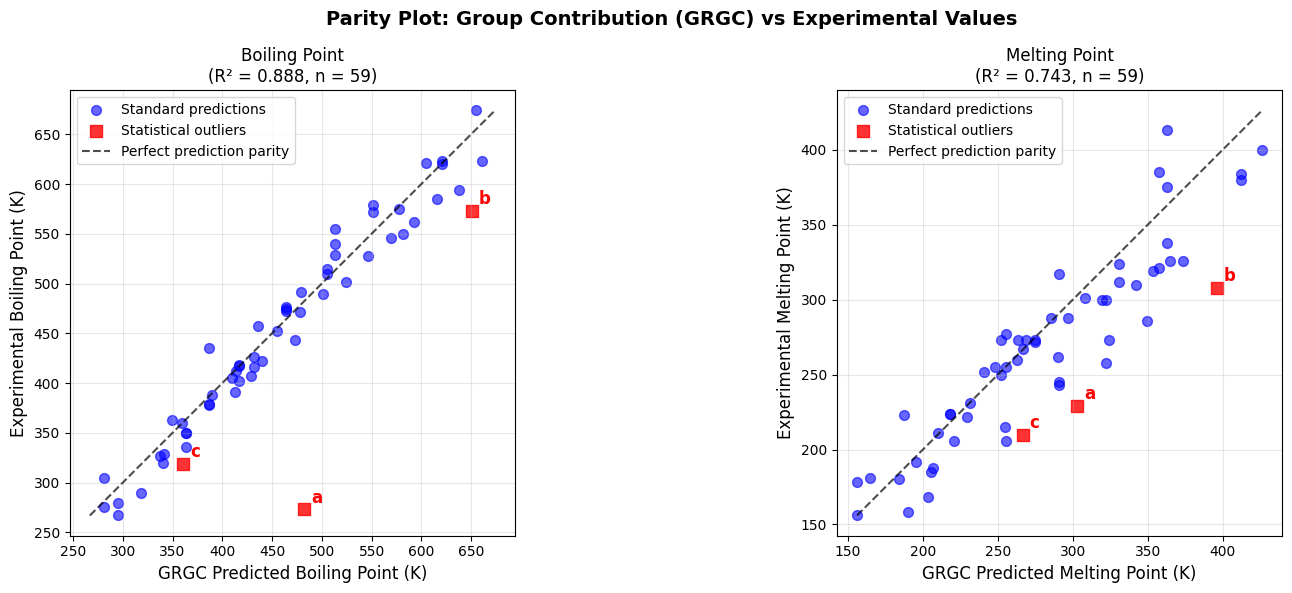


Thermophysical Property Outlier Analysis (Top 4 deviations per property):

Boiling Point Prediction Outliers:
  a: NCCCCCCN...
     GRGC: 481.94, Experimental: 273.00, Error: 76.5%
  b: c1ccc(cc1)CCc2ccc(N)cc2...
     GRGC: 650.79, Experimental: 573.00, Error: 13.6%
  c: CC(C)(C)N...
     GRGC: 360.42, Experimental: 319.00, Error: 13.0%

Melting Point Prediction Outliers:
  a:  CC1=NC(C)=CC(C)=C1...
     GRGC: 302.92, Experimental: 229.00, Error: 32.3%
  b: c1ccc(cc1)CCc2ccc(N)cc2...
     GRGC: 396.16, Experimental: 308.00, Error: 28.6%
  c: CCC1=CC=CC=N1...
     GRGC: 266.61, Experimental: 210.00, Error: 27.0%


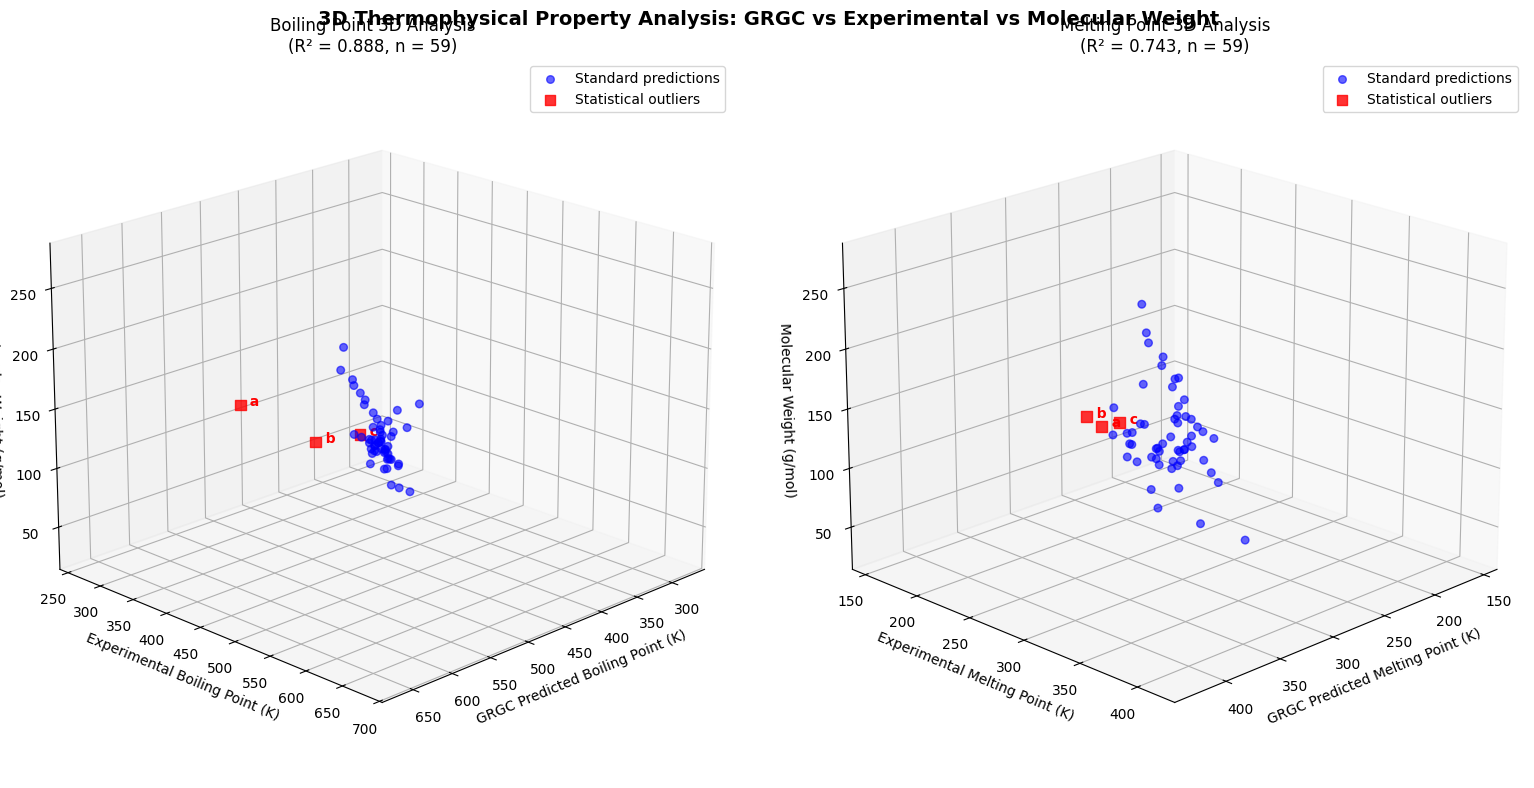


Comprehensive Thermophysical Property Prediction Analysis:

Boiling Point Prediction Statistics:
  Number of molecular compounds: 59
  Coefficient of determination (R²): 0.8878
  Mean absolute error (MAE): 21.2388
  Root mean square error (RMSE): 35.4835
  Mean absolute percentage error (MAPE): 5.31%
  GRGC prediction range: 280.68 - 661.09
  Experimental range: 267.00 - 674.00

Melting Point Prediction Statistics:
  Number of molecular compounds: 59
  Coefficient of determination (R²): 0.7432
  Mean absolute error (MAE): 24.0195
  Root mean square error (RMSE): 31.5877
  Mean absolute percentage error (MAPE): 9.22%
  GRGC prediction range: 156.04 - 426.28
  Experimental range: 156.00 - 413.00


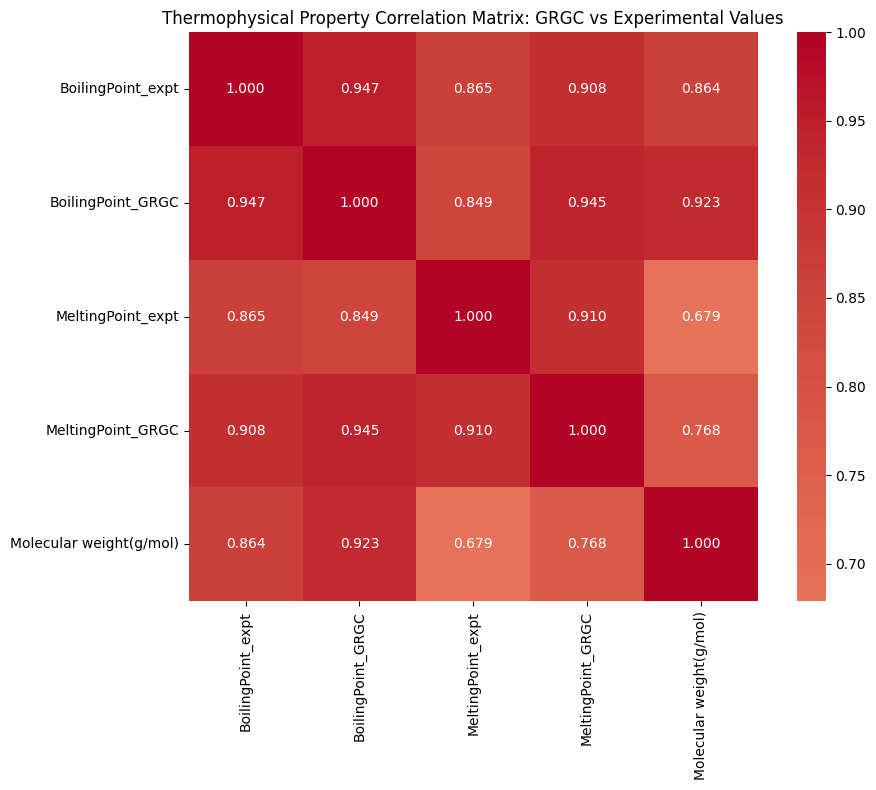

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score
import seaborn as sns

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

def identifyStatisticalOutliers(thermophysicalDataFrame, databasePropertyColumn, groupContributionPropertyColumn, errorPercentileThreshold=95):
    """
    Identify statistical outliers in thermophysical property predictions based on relative error

    Parameters:
    -----------
    thermophysicalDataFrame : pandas.DataFrame
        DataFrame containing experimental and predicted property data
    databasePropertyColumn : str
        Column name for database (experimental) property values
    groupContributionPropertyColumn : str
        Column name for group contribution method predicted values
    errorPercentileThreshold : float
        Percentile threshold for outlier identification (default: 95th percentile)

    Returns:
    --------
    tuple : (outlier_mask, relative_errors)
        Boolean mask for outliers and array of relative errors
    """
    # Calculate relative error using standard thermophysical property evaluation metrics
    relativeError = np.abs((thermophysicalDataFrame[databasePropertyColumn] -
                           thermophysicalDataFrame[groupContributionPropertyColumn]) /
                          thermophysicalDataFrame[databasePropertyColumn]) * 100

    # Ensure relativeError series has the same index as the input dataframe
    relativeError.index = thermophysicalDataFrame.index

    # Identify outliers based on statistical distribution
    errorThreshold = np.percentile(relativeError.dropna(), errorPercentileThreshold)
    outlierMask = relativeError > errorThreshold

    return outlierMask, relativeError

def plotGroupContributionVsDatabaseComparison(thermophysicalDataFrame):
    """
    Generate 2D parity plots comparing Group Contribution (GRGC) predictions
    with experimental values for thermophysical properties

    Parameters:
    -----------
    thermophysicalDataFrame : pandas.DataFrame
        DataFrame containing both predicted and experimental property data
    """
    # Define thermophysical properties for analysis (removed molecular weight)
    thermophysicalProperties = [
        ('BoilingPoint_expt', 'BoilingPoint_GRGC', 'Boiling Point', 'K'),
        ('MeltingPoint_expt', 'MeltingPoint_GRGC', 'Melting Point', 'K')
    ]

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Parity Plot: Group Contribution (GRGC) vs Experimental Values',
                 fontsize=14, fontweight='bold')

    outlierInformation = {}

    for propertyIndex, (databaseColumn, groupContributionColumn, propertyName, propertyUnit) in enumerate(thermophysicalProperties):
        currentAxis = axes[propertyIndex]

        # Filter experimental data where both predicted and experimental values exist
        validDataMask = (thermophysicalDataFrame[databaseColumn].notna() &
                        thermophysicalDataFrame[groupContributionColumn].notna())

        if validDataMask.sum() == 0:
            currentAxis.text(0.5, 0.5, f'Insufficient experimental data\nfor {propertyName}',
                           ha='center', va='center', transform=currentAxis.transAxes, fontsize=12)
            currentAxis.set_title(f'{propertyName}')
            continue

        validPropertyData = thermophysicalDataFrame[validDataMask].copy()

        # Identify thermophysical property prediction outliers
        outlierMask, relativeErrors = identifyStatisticalOutliers(validPropertyData,
                                                                 databaseColumn,
                                                                 groupContributionColumn)

        # Plot standard property predictions
        normalPredictionMask = ~outlierMask
        currentAxis.scatter(validPropertyData[normalPredictionMask][groupContributionColumn],
                          validPropertyData[normalPredictionMask][databaseColumn],
                          alpha=0.6, s=50, c='blue', label='Standard predictions')

        # Highlight thermophysical property outliers
        if outlierMask.sum() > 0:
            outlierPropertyData = validPropertyData[outlierMask]
            currentAxis.scatter(outlierPropertyData[groupContributionColumn],
                              outlierPropertyData[databaseColumn],
                              alpha=0.8, s=80, c='red', marker='s', label='Statistical outliers')

            # Annotate most significant thermophysical property outliers
            topThermophysicalOutliers = outlierPropertyData.loc[relativeErrors[outlierMask].nlargest(4).index]
            for outlierIndex, (dataFrameIndex, molecularRow) in enumerate(topThermophysicalOutliers.iterrows()):
                currentAxis.annotate(f'{chr(97+outlierIndex)}',
                                   (molecularRow[groupContributionColumn], molecularRow[databaseColumn]),
                                   xytext=(5, 5), textcoords='offset points',
                                   fontsize=12, fontweight='bold', color='red')

            # Store outlier molecular information
            outlierInformation[propertyName] = topThermophysicalOutliers[['SMILES',
                                                                         groupContributionColumn,
                                                                         databaseColumn]].copy()

        # Plot ideal prediction line (perfect parity)
        minimumPropertyValue = min(validPropertyData[groupContributionColumn].min(),
                                 validPropertyData[databaseColumn].min())
        maximumPropertyValue = max(validPropertyData[groupContributionColumn].max(),
                                 validPropertyData[databaseColumn].max())
        currentAxis.plot([minimumPropertyValue, maximumPropertyValue],
                        [minimumPropertyValue, maximumPropertyValue],
                        'k--', alpha=0.7, label='Perfect prediction parity')

        # Calculate coefficient of determination (R²)
        coefficientOfDetermination = r2_score(validPropertyData[databaseColumn],
                                            validPropertyData[groupContributionColumn])

        # Format thermophysical property plot
        currentAxis.set_xlabel(f'GRGC Predicted {propertyName} ({propertyUnit})', fontsize=12)
        currentAxis.set_ylabel(f'Experimental {propertyName} ({propertyUnit})', fontsize=12)
        currentAxis.set_title(f'{propertyName}\n(R² = {coefficientOfDetermination:.3f}, n = {len(validPropertyData)})',
                             fontsize=12)
        currentAxis.grid(True, alpha=0.3)
        currentAxis.legend()
        currentAxis.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.show()

    # Display thermophysical property outlier analysis
    print("\nThermophysical Property Outlier Analysis (Top 4 deviations per property):")
    print("="*80)
    for propertyName, outlierMolecules in outlierInformation.items():
        if len(outlierMolecules) > 0:
            print(f"\n{propertyName} Prediction Outliers:")
            for outlierIndex, (dataIndex, molecularData) in enumerate(outlierMolecules.iterrows()):
                groupContributionValue = molecularData[thermophysicalProperties[[prop[2] for prop in thermophysicalProperties].index(propertyName)][1]]
                experimentalValue = molecularData[thermophysicalProperties[[prop[2] for prop in thermophysicalProperties].index(propertyName)][0]]
                relativeError = abs((experimentalValue - groupContributionValue) / experimentalValue * 100) if experimentalValue != 0 else np.inf
                print(f"  {chr(97+outlierIndex)}: {molecularData['SMILES'][:50]}...")
                print(f"     GRGC: {groupContributionValue:.2f}, Experimental: {experimentalValue:.2f}, Error: {relativeError:.1f}%")

def plotThreeDimensionalPropertyComparison(thermophysicalDataFrame):
    """
    Generate 3D visualization comparing GRGC predictions vs experimental data vs molecular weight
    for thermophysical property analysis

    Parameters:
    -----------
    thermophysicalDataFrame : pandas.DataFrame
        DataFrame containing molecular property predictions and experimental values
    """
    thermophysicalProperties = [
        ('BoilingPoint_expt', 'BoilingPoint_GRGC', 'Boiling Point', 'K'),
        ('MeltingPoint_expt', 'MeltingPoint_GRGC', 'Melting Point', 'K')
    ]

    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('3D Thermophysical Property Analysis: GRGC vs Experimental vs Molecular Weight',
                 fontsize=14, fontweight='bold')

    for propertyIndex, (databaseColumn, groupContributionColumn, propertyName, propertyUnit) in enumerate(thermophysicalProperties):
        currentAxis = fig.add_subplot(1, 2, propertyIndex+1, projection='3d')

        # Use molecular weight for third dimension
        molecularWeightColumn = 'Molecular weight(g/mol)'

        # Filter valid thermophysical property data
        validThreeDimensionalMask = (thermophysicalDataFrame[databaseColumn].notna() &
                                   thermophysicalDataFrame[groupContributionColumn].notna() &
                                   thermophysicalDataFrame[molecularWeightColumn].notna())

        if validThreeDimensionalMask.sum() == 0:
            currentAxis.text(0.5, 0.5, 0.5, f'Insufficient 3D data\nfor {propertyName}',
                           ha='center', va='center', transform=currentAxis.transAxes)
            continue

        validThreeDimensionalData = thermophysicalDataFrame[validThreeDimensionalMask].copy()

        # Identify thermophysical property outliers in 3D space
        outlierMask, relativeErrors = identifyStatisticalOutliers(validThreeDimensionalData,
                                                                 databaseColumn,
                                                                 groupContributionColumn)

        # Plot standard thermophysical property predictions
        normalPredictionMask = ~outlierMask
        if normalPredictionMask.sum() > 0:
            currentAxis.scatter(validThreeDimensionalData[normalPredictionMask][groupContributionColumn],
                              validThreeDimensionalData[normalPredictionMask][databaseColumn],
                              validThreeDimensionalData[normalPredictionMask][molecularWeightColumn],
                              alpha=0.6, s=30, c='blue', label='Standard predictions')

        # Highlight thermophysical property outliers in 3D
        if outlierMask.sum() > 0:
            outlierThreeDimensionalData = validThreeDimensionalData[outlierMask]
            currentAxis.scatter(outlierThreeDimensionalData[groupContributionColumn],
                              outlierThreeDimensionalData[databaseColumn],
                              outlierThreeDimensionalData[molecularWeightColumn],
                              alpha=0.8, s=60, c='red', marker='s', label='Statistical outliers')

            # Annotate significant thermophysical outliers
            topThreeDimensionalOutliers = outlierThreeDimensionalData.loc[relativeErrors[outlierMask].nlargest(4).index]
            for outlierIndex, (dataIndex, molecularRow) in enumerate(topThreeDimensionalOutliers.iterrows()):
                currentAxis.text(molecularRow[groupContributionColumn],
                               molecularRow[databaseColumn],
                               molecularRow[molecularWeightColumn],
                               f'  {chr(97+outlierIndex)}',
                               fontsize=10, fontweight='bold', color='red')

        # Calculate statistical metrics for thermophysical properties
        coefficientOfDetermination = r2_score(validThreeDimensionalData[databaseColumn],
                                            validThreeDimensionalData[groupContributionColumn])

        # Format 3D thermophysical property visualization
        currentAxis.set_xlabel(f'GRGC Predicted {propertyName} ({propertyUnit})', fontsize=10)
        currentAxis.set_ylabel(f'Experimental {propertyName} ({propertyUnit})', fontsize=10)
        currentAxis.set_zlabel('Molecular Weight (g/mol)', fontsize=10)
        currentAxis.set_title(f'{propertyName} 3D Analysis\n(R² = {coefficientOfDetermination:.3f}, n = {len(validThreeDimensionalData)})',
                             fontsize=12)
        currentAxis.legend()
        currentAxis.view_init(elev=20, azim=45)

    plt.tight_layout()
    plt.show()

def performThermophysicalPropertyAnalysis(thermophysicalDataFrame):
    """
    Conduct comprehensive statistical analysis of thermophysical property predictions
    comparing Group Contribution (GRGC) method with experimental values

    Parameters:
    -----------
    thermophysicalDataFrame : pandas.DataFrame
        DataFrame containing both predicted and experimental thermophysical properties
    """
    thermophysicalProperties = [
        ('BoilingPoint_expt', 'BoilingPoint_GRGC', 'Boiling Point'),
        ('MeltingPoint_expt', 'MeltingPoint_GRGC', 'Melting Point')
    ]

    print("\nComprehensive Thermophysical Property Prediction Analysis:")
    print("="*80)

    for databaseColumn, groupContributionColumn, propertyName in thermophysicalProperties:
        validPropertyMask = (thermophysicalDataFrame[databaseColumn].notna() &
                           thermophysicalDataFrame[groupContributionColumn].notna())

        if validPropertyMask.sum() == 0:
            print(f"\n{propertyName}: Insufficient experimental data for analysis")
            continue

        validPropertyData = thermophysicalDataFrame[validPropertyMask]

        # Calculate standard thermophysical property prediction metrics
        meanAbsoluteError = np.mean(np.abs(validPropertyData[databaseColumn] -
                                         validPropertyData[groupContributionColumn]))
        rootMeanSquareError = np.sqrt(np.mean((validPropertyData[databaseColumn] -
                                             validPropertyData[groupContributionColumn])**2))
        meanAbsolutePercentageError = np.mean(np.abs((validPropertyData[databaseColumn] -
                                                     validPropertyData[groupContributionColumn]) /
                                                    validPropertyData[databaseColumn])) * 100
        coefficientOfDetermination = r2_score(validPropertyData[databaseColumn],
                                            validPropertyData[groupContributionColumn])

        print(f"\n{propertyName} Prediction Statistics:")
        print(f"  Number of molecular compounds: {len(validPropertyData)}")
        print(f"  Coefficient of determination (R²): {coefficientOfDetermination:.4f}")
        print(f"  Mean absolute error (MAE): {meanAbsoluteError:.4f}")
        print(f"  Root mean square error (RMSE): {rootMeanSquareError:.4f}")
        print(f"  Mean absolute percentage error (MAPE): {meanAbsolutePercentageError:.2f}%")

        # Thermophysical property range analysis
        print(f"  GRGC prediction range: {validPropertyData[groupContributionColumn].min():.2f} - {validPropertyData[groupContributionColumn].max():.2f}")
        print(f"  Experimental range: {validPropertyData[databaseColumn].min():.2f} - {validPropertyData[databaseColumn].max():.2f}")

def generatePropertyCorrelationMatrix(thermophysicalDataFrame):
    """
    Generate correlation matrix heatmap for thermophysical property predictions
    comparing Group Contribution (GRGC) with experimental values

    Parameters:
    -----------
    thermophysicalDataFrame : pandas.DataFrame
        DataFrame containing thermophysical property predictions and experimental data
    """
    # Select only the relevant columns for correlation analysis
    correlationColumns = ['BoilingPoint_expt', 'BoilingPoint_GRGC',
                         'MeltingPoint_expt', 'MeltingPoint_GRGC',
                         'Molecular weight(g/mol)']

    # Filter to only include columns that exist in the dataframe
    availableColumns = [col for col in correlationColumns if col in thermophysicalDataFrame.columns]

    correlationPropertyData = thermophysicalDataFrame[availableColumns].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlationPropertyData, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f')
    plt.title('Thermophysical Property Correlation Matrix: GRGC vs Experimental Values')
    plt.tight_layout()
    plt.show()

def analyzeDataFrameStructure(thermophysicalDataFrame):
    """
    Analyze the structure and content of the thermophysical dataframe

    Parameters:
    -----------
    thermophysicalDataFrame : pandas.DataFrame
        DataFrame to analyze
    """
    print("DataFrame Structure Analysis:")
    print("="*50)
    print(f"Shape: {thermophysicalDataFrame.shape}")
    print(f"Columns: {list(thermophysicalDataFrame.columns)}")

    print(f"\nData Availability:")
    print("-"*30)
    for col in thermophysicalDataFrame.columns:
        non_null = thermophysicalDataFrame[col].notna().sum()
        null_count = thermophysicalDataFrame[col].isna().sum()
        print(f"{col}: {non_null} non-null, {null_count} null")

    print(f"\nSample Data:")
    print("-"*30)
    print(thermophysicalDataFrame.head())

# Usage example:
# Assuming your dataframe is named 'your_dataframe'
# Replace 'your_dataframe' with the actual name of your dataframe

def runCompleteAnalysis(thermophysicalDataFrame):
    """
    Run the complete thermophysical property analysis

    Parameters:
    -----------
    thermophysicalDataFrame : pandas.DataFrame
        DataFrame with columns: 'SMILES', 'Molecular weight(g/mol)', 'BoilingPoint_expt',
        'BoilingPoint_GRGC', 'MeltingPoint_expt', 'MeltingPoint_GRGC'
    """
    # Analyze dataframe structure
    analyzeDataFrameStructure(thermophysicalDataFrame)

    # Generate 2D parity plots
    plotGroupContributionVsDatabaseComparison(thermophysicalDataFrame)

    # Generate 3D visualization
    plotThreeDimensionalPropertyComparison(thermophysicalDataFrame)

    # Perform statistical analysis
    performThermophysicalPropertyAnalysis(thermophysicalDataFrame)

    # Generate correlation matrix
    generatePropertyCorrelationMatrix(thermophysicalDataFrame)

# Run the code:
runCompleteAnalysis(processedEngTboxDF)

### Now re-calculating R^2 by removing stastical outliers




Statistical Outlier Removal Analysis:

Boiling Point Outlier Analysis:
  Valid data points: 59
  Outliers identified: 3 (5.1%)
  R² before removal: 0.8878
  R² after removal: 0.9617
  R² improvement: +0.0739

Melting Point Outlier Analysis:
  Valid data points: 59
  Outliers identified: 3 (5.1%)
  R² before removal: 0.7432
  R² after removal: 0.8096
  R² improvement: +0.0664

Overall Outlier Removal Summary:
  Original dataset size: 59
  Final dataset size: 54
  Total outliers removed: 5 (8.5%)
COMPLETE OUTLIER ANALYSIS WORKFLOW
Statistical Outlier Removal Analysis:

Boiling Point Outlier Analysis:
  Valid data points: 59
  Outliers identified: 3 (5.1%)
  R² before removal: 0.8878
  R² after removal: 0.9617
  R² improvement: +0.0739

Melting Point Outlier Analysis:
  Valid data points: 59
  Outliers identified: 3 (5.1%)
  R² before removal: 0.7432
  R² after removal: 0.8096
  R² improvement: +0.0664

Overall Outlier Removal Summary:
  Original dataset size: 59
  Final dataset size: 54


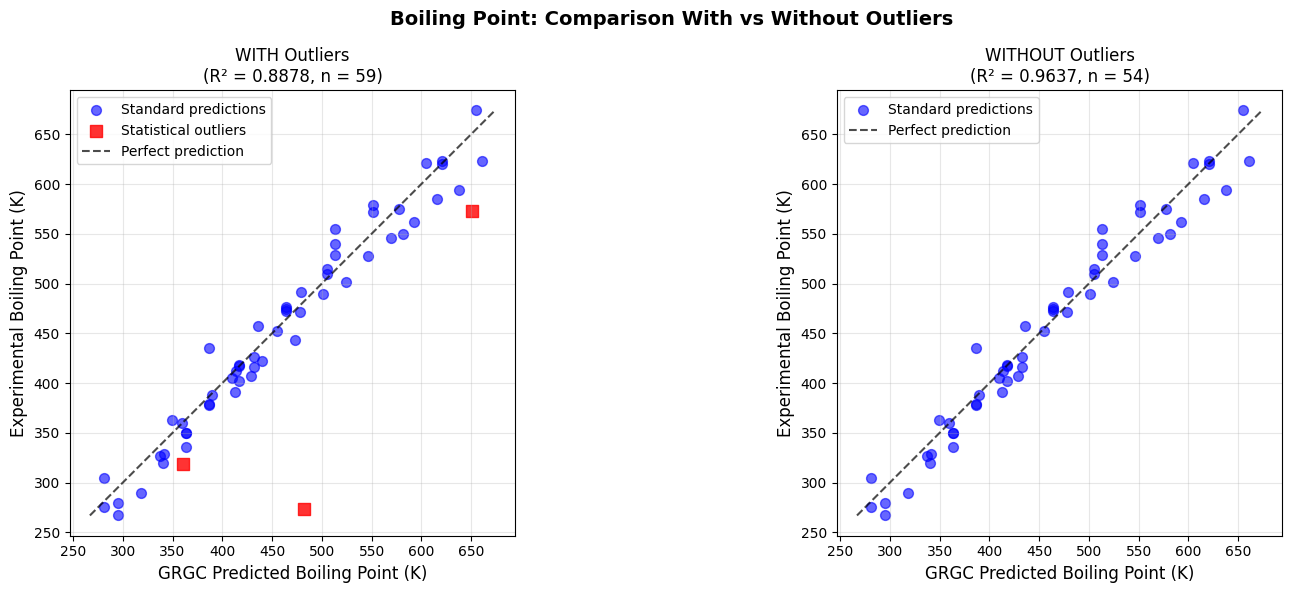


Melting Point R² Improvement: +0.0758


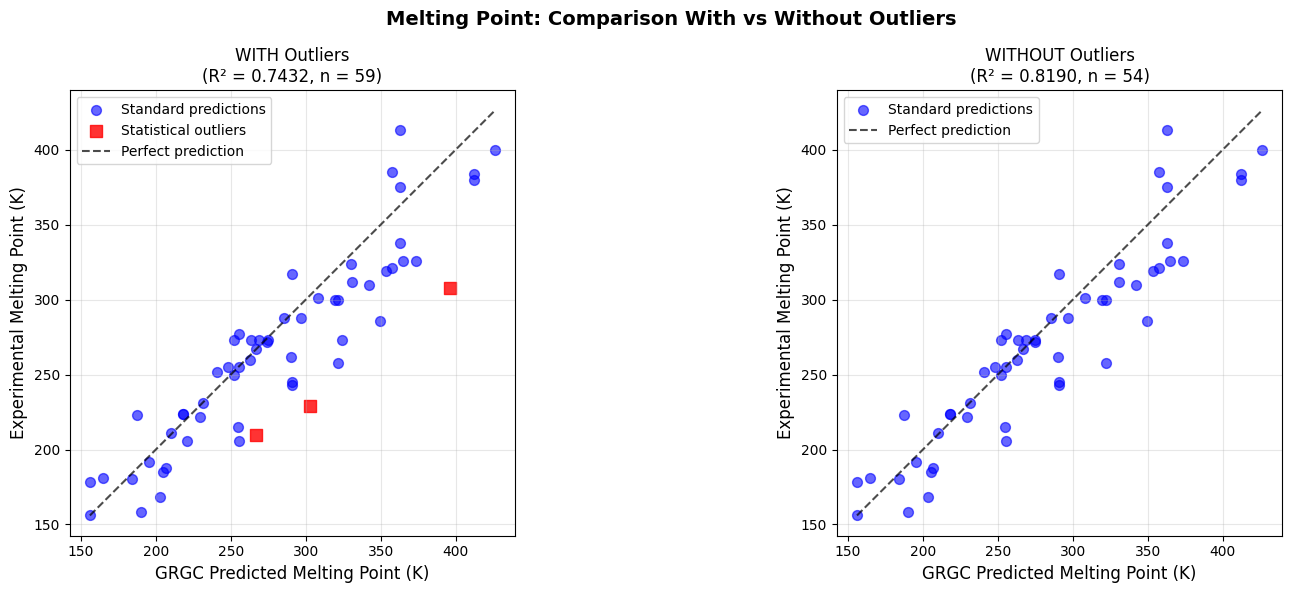


DETAILED STATISTICAL COMPARISON: ORIGINAL vs CLEANED DATA

Boiling Point Detailed Analysis:
--------------------------------------------------
  Dataset Size:
    Original: 59 compounds
    Cleaned:  54 compounds
    Removed:  5 compounds
  R² Values:
    Original: 0.8878
    Cleaned:  0.9637
    Change:   +0.0759
  MAE Values:
    Original: 21.2388
    Cleaned:  16.2374
    Change:   -5.0014
  RMSE Values:
    Original: 35.4835
    Cleaned:  20.0162
    Change:   -15.4673
  MAPE Values:
    Original: 5.31%
    Cleaned:  3.68%
    Change:   -1.62%

Melting Point Detailed Analysis:
--------------------------------------------------
  Dataset Size:
    Original: 59 compounds
    Cleaned:  54 compounds
    Removed:  5 compounds
  R² Values:
    Original: 0.7432
    Cleaned:  0.8190
    Change:   +0.0758
  MAE Values:
    Original: 24.0195
    Cleaned:  20.9822
    Change:   -3.0373
  RMSE Values:
    Original: 31.5877
    Cleaned:  27.0892
    Change:   -4.4985
  MAPE Values:
    Origina

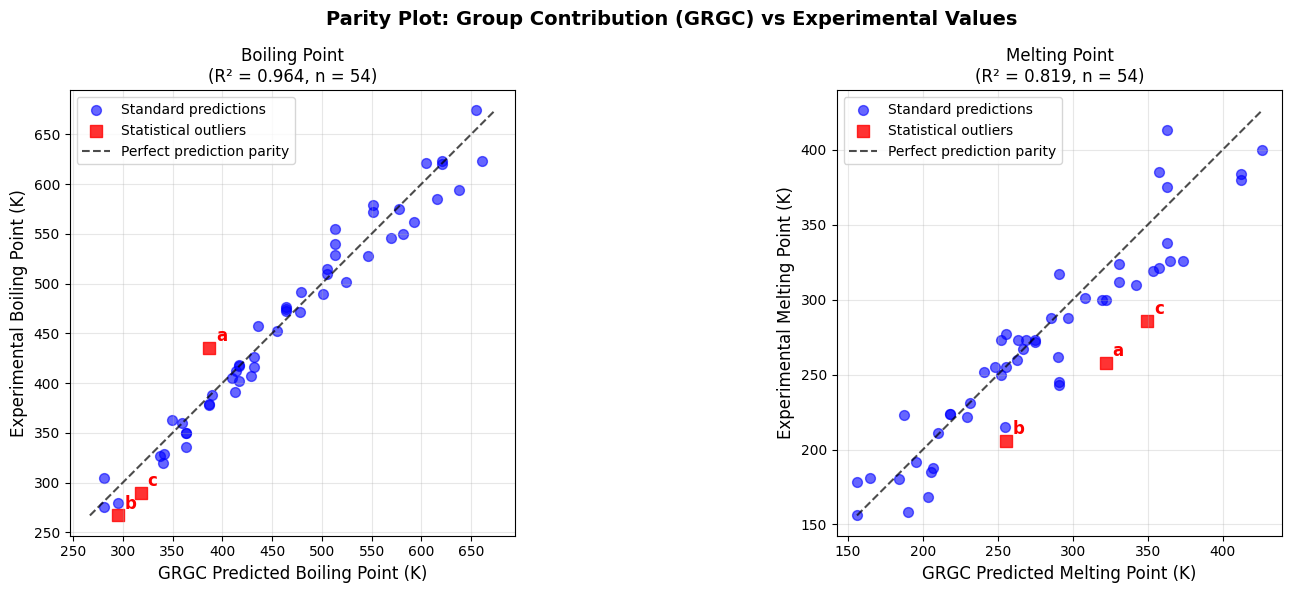


Thermophysical Property Outlier Analysis (Top 4 deviations per property):

Boiling Point Prediction Outliers:
  a: CCCN(CCC)...
     GRGC: 387.05, Experimental: 435.00, Error: 11.0%
  b: CN...
     GRGC: 295.01, Experimental: 267.00, Error: 10.5%
  c: CCN...
     GRGC: 317.89, Experimental: 290.00, Error: 9.6%

Melting Point Prediction Outliers:
  a: c1ccc2ncccc2c1...
     GRGC: 321.85, Experimental: 258.00, Error: 24.7%
  b: CC1=CC=CC=N1...
     GRGC: 255.34, Experimental: 206.00, Error: 24.0%
  c: c1ccc(cc1)Cc2ccccn2...
     GRGC: 349.38, Experimental: 286.00, Error: 22.2%


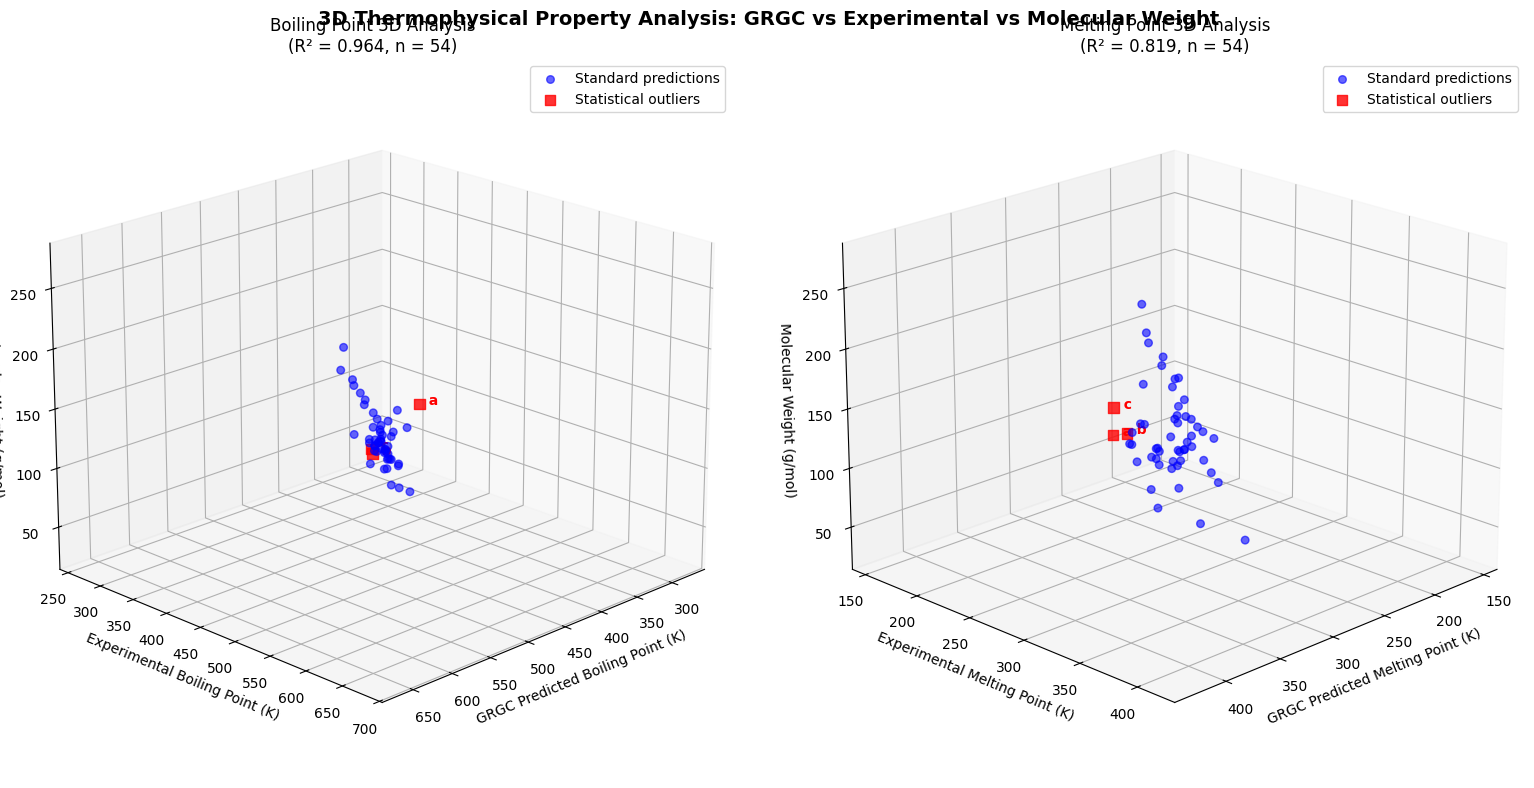


Comprehensive Thermophysical Property Prediction Analysis:

Boiling Point Prediction Statistics:
  Number of molecular compounds: 54
  Coefficient of determination (R²): 0.9637
  Mean absolute error (MAE): 16.2374
  Root mean square error (RMSE): 20.0162
  Mean absolute percentage error (MAPE): 3.68%
  GRGC prediction range: 280.68 - 661.09
  Experimental range: 267.00 - 674.00

Melting Point Prediction Statistics:
  Number of molecular compounds: 54
  Coefficient of determination (R²): 0.8190
  Mean absolute error (MAE): 20.9822
  Root mean square error (RMSE): 27.0892
  Mean absolute percentage error (MAPE): 7.97%
  GRGC prediction range: 156.04 - 426.28
  Experimental range: 156.00 - 413.00


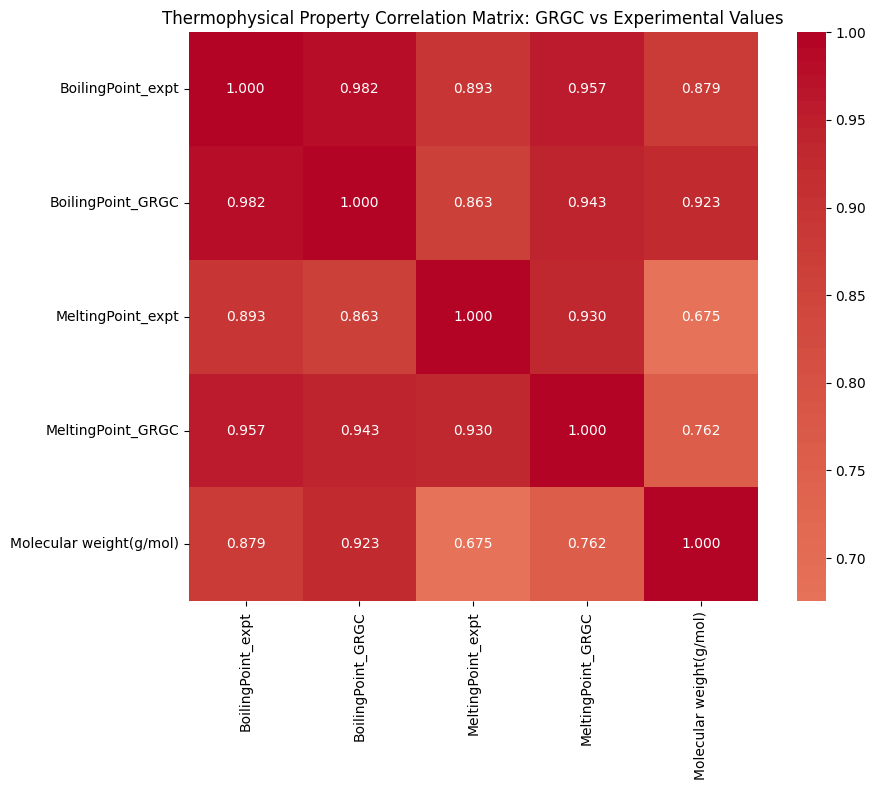

In [ ]:
def removeStatisticalOutliersAndAnalyze(thermophysicalDataFrame, errorPercentileThreshold=95):
    """
    Remove statistical outliers and perform analysis on cleaned dataset

    Parameters:
    -----------
    thermophysicalDataFrame : pandas.DataFrame
        Original dataframe with outliers
    errorPercentileThreshold : float
        Percentile threshold for outlier identification (default: 95th percentile)

    Returns:
    --------
    cleanedDataFrame : pandas.DataFrame
        DataFrame with outliers removed
    """
    thermophysicalProperties = [
        ('BoilingPoint_expt', 'BoilingPoint_GRGC', 'Boiling Point'),
        ('MeltingPoint_expt', 'MeltingPoint_GRGC', 'Melting Point')
    ]

    print("Statistical Outlier Removal Analysis:")
    print("="*60)

    # Create a copy of the original dataframe
    cleanedDataFrame = thermophysicalDataFrame.copy()
    originalSize = len(cleanedDataFrame)

    outliers_to_remove = set()  # Use set to avoid duplicate indices

    for databaseColumn, groupContributionColumn, propertyName in thermophysicalProperties:
        # Get valid data for this property
        validPropertyMask = (cleanedDataFrame[databaseColumn].notna() &
                           cleanedDataFrame[groupContributionColumn].notna())

        if validPropertyMask.sum() == 0:
            print(f"\n{propertyName}: No valid data for outlier analysis")
            continue

        validPropertyData = cleanedDataFrame[validPropertyMask]

        # Calculate R² before outlier removal
        r2_before = r2_score(validPropertyData[databaseColumn],
                           validPropertyData[groupContributionColumn])

        # Identify outliers
        outlierMask, relativeErrors = identifyStatisticalOutliers(
            validPropertyData, databaseColumn, groupContributionColumn, errorPercentileThreshold
        )

        # Get indices of outliers
        outlier_indices = validPropertyData[outlierMask].index.tolist()
        outliers_to_remove.update(outlier_indices)

        # Calculate statistics
        outlier_count = outlierMask.sum()
        outlier_percentage = (outlier_count / len(validPropertyData)) * 100

        print(f"\n{propertyName} Outlier Analysis:")
        print(f"  Valid data points: {len(validPropertyData)}")
        print(f"  Outliers identified: {outlier_count} ({outlier_percentage:.1f}%)")
        print(f"  R² before removal: {r2_before:.4f}")

        if outlier_count > 0:
            # Calculate R² after removing outliers for this property only
            non_outlier_data = validPropertyData[~outlierMask]
            r2_after = r2_score(non_outlier_data[databaseColumn],
                              non_outlier_data[groupContributionColumn])
            improvement = r2_after - r2_before
            print(f"  R² after removal: {r2_after:.4f}")
            print(f"  R² improvement: {improvement:+.4f}")

    # Remove all identified outliers
    cleanedDataFrame = cleanedDataFrame.drop(index=list(outliers_to_remove))

    finalSize = len(cleanedDataFrame)
    totalOutliersRemoved = originalSize - finalSize
    totalOutlierPercentage = (totalOutliersRemoved / originalSize) * 100

    print(f"\nOverall Outlier Removal Summary:")
    print(f"  Original dataset size: {originalSize}")
    print(f"  Final dataset size: {finalSize}")
    print(f"  Total outliers removed: {totalOutliersRemoved} ({totalOutlierPercentage:.1f}%)")

    return cleanedDataFrame

def plotComparisonWithAndWithoutOutliers(originalDataFrame, cleanedDataFrame):
    """
    Create side-by-side comparison plots showing data with and without outliers

    Parameters:
    -----------
    originalDataFrame : pandas.DataFrame
        Original dataframe with outliers
    cleanedDataFrame : pandas.DataFrame
        Cleaned dataframe without outliers
    """
    thermophysicalProperties = [
        ('BoilingPoint_expt', 'BoilingPoint_GRGC', 'Boiling Point', 'K'),
        ('MeltingPoint_expt', 'MeltingPoint_GRGC', 'Melting Point', 'K')
    ]

    for databaseColumn, groupContributionColumn, propertyName, propertyUnit in thermophysicalProperties:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f'{propertyName}: Comparison With vs Without Outliers',
                     fontsize=14, fontweight='bold')

        # Plot 1: Original data with outliers highlighted
        validOriginalMask = (originalDataFrame[databaseColumn].notna() &
                           originalDataFrame[groupContributionColumn].notna())

        if validOriginalMask.sum() > 0:
            validOriginalData = originalDataFrame[validOriginalMask]

            # Identify outliers in original data
            outlierMask, _ = identifyStatisticalOutliers(validOriginalData,
                                                       databaseColumn,
                                                       groupContributionColumn)

            # Plot normal points
            normalMask = ~outlierMask
            ax1.scatter(validOriginalData[normalMask][groupContributionColumn],
                       validOriginalData[normalMask][databaseColumn],
                       alpha=0.6, s=50, c='blue', label='Standard predictions')

            # Plot outliers
            if outlierMask.sum() > 0:
                ax1.scatter(validOriginalData[outlierMask][groupContributionColumn],
                           validOriginalData[outlierMask][databaseColumn],
                           alpha=0.8, s=80, c='red', marker='s', label='Statistical outliers')

            # Perfect prediction line
            min_val1 = min(validOriginalData[groupContributionColumn].min(),
                          validOriginalData[databaseColumn].min())
            max_val1 = max(validOriginalData[groupContributionColumn].max(),
                          validOriginalData[databaseColumn].max())
            ax1.plot([min_val1, max_val1], [min_val1, max_val1],
                    'k--', alpha=0.7, label='Perfect prediction')

            # Calculate R² for original data
            r2_original = r2_score(validOriginalData[databaseColumn],
                                 validOriginalData[groupContributionColumn])

            ax1.set_title(f'WITH Outliers\n(R² = {r2_original:.4f}, n = {len(validOriginalData)})')

        # Plot 2: Cleaned data without outliers
        validCleanedMask = (cleanedDataFrame[databaseColumn].notna() &
                          cleanedDataFrame[groupContributionColumn].notna())

        if validCleanedMask.sum() > 0:
            validCleanedData = cleanedDataFrame[validCleanedMask]

            ax2.scatter(validCleanedData[groupContributionColumn],
                       validCleanedData[databaseColumn],
                       alpha=0.6, s=50, c='blue', label='Standard predictions')

            # Perfect prediction line
            min_val2 = min(validCleanedData[groupContributionColumn].min(),
                          validCleanedData[databaseColumn].min())
            max_val2 = max(validCleanedData[groupContributionColumn].max(),
                          validCleanedData[databaseColumn].max())
            ax2.plot([min_val2, max_val2], [min_val2, max_val2],
                    'k--', alpha=0.7, label='Perfect prediction')

            # Calculate R² for cleaned data
            r2_cleaned = r2_score(validCleanedData[databaseColumn],
                                validCleanedData[groupContributionColumn])

            ax2.set_title(f'WITHOUT Outliers\n(R² = {r2_cleaned:.4f}, n = {len(validCleanedData)})')

            # Print improvement
            if validOriginalMask.sum() > 0:
                improvement = r2_cleaned - r2_original
                print(f"\n{propertyName} R² Improvement: {improvement:+.4f}")

        # Formatting for both plots
        for ax in [ax1, ax2]:
            ax.set_xlabel(f'GRGC Predicted {propertyName} ({propertyUnit})', fontsize=12)
            ax.set_ylabel(f'Experimental {propertyName} ({propertyUnit})', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.legend()
            ax.set_aspect('equal', adjustable='box')

        plt.tight_layout()
        plt.show()

def performComprehensiveOutlierAnalysis(originalDataFrame, errorPercentileThreshold=95):
    """
    Perform comprehensive analysis comparing original vs cleaned data

    Parameters:
    -----------
    originalDataFrame : pandas.DataFrame
        Original dataframe with outliers
    errorPercentileThreshold : float
        Percentile threshold for outlier identification

    Returns:
    --------
    cleanedDataFrame : pandas.DataFrame
        Cleaned dataframe without outliers
    """
    # Remove outliers
    cleanedDataFrame = removeStatisticalOutliersAndAnalyze(originalDataFrame, errorPercentileThreshold)

    # Create comparison plots
    plotComparisonWithAndWithoutOutliers(originalDataFrame, cleanedDataFrame)

    # Perform detailed statistical analysis comparison
    print("\n" + "="*80)
    print("DETAILED STATISTICAL COMPARISON: ORIGINAL vs CLEANED DATA")
    print("="*80)

    thermophysicalProperties = [
        ('BoilingPoint_expt', 'BoilingPoint_GRGC', 'Boiling Point'),
        ('MeltingPoint_expt', 'MeltingPoint_GRGC', 'Melting Point')
    ]

    for databaseColumn, groupContributionColumn, propertyName in thermophysicalProperties:
        print(f"\n{propertyName} Detailed Analysis:")
        print("-" * 50)

        # Original data analysis
        validOriginalMask = (originalDataFrame[databaseColumn].notna() &
                           originalDataFrame[groupContributionColumn].notna())

        # Cleaned data analysis
        validCleanedMask = (cleanedDataFrame[databaseColumn].notna() &
                          cleanedDataFrame[groupContributionColumn].notna())

        if validOriginalMask.sum() > 0 and validCleanedMask.sum() > 0:
            validOriginalData = originalDataFrame[validOriginalMask]
            validCleanedData = cleanedDataFrame[validCleanedMask]

            # Calculate metrics for original data
            r2_orig = r2_score(validOriginalData[databaseColumn], validOriginalData[groupContributionColumn])
            mae_orig = np.mean(np.abs(validOriginalData[databaseColumn] - validOriginalData[groupContributionColumn]))
            rmse_orig = np.sqrt(np.mean((validOriginalData[databaseColumn] - validOriginalData[groupContributionColumn])**2))
            mape_orig = np.mean(np.abs((validOriginalData[databaseColumn] - validOriginalData[groupContributionColumn]) / validOriginalData[databaseColumn])) * 100

            # Calculate metrics for cleaned data
            r2_clean = r2_score(validCleanedData[databaseColumn], validCleanedData[groupContributionColumn])
            mae_clean = np.mean(np.abs(validCleanedData[databaseColumn] - validCleanedData[groupContributionColumn]))
            rmse_clean = np.sqrt(np.mean((validCleanedData[databaseColumn] - validCleanedData[groupContributionColumn])**2))
            mape_clean = np.mean(np.abs((validCleanedData[databaseColumn] - validCleanedData[groupContributionColumn]) / validCleanedData[databaseColumn])) * 100

            # Display comparison
            print(f"  Dataset Size:")
            print(f"    Original: {len(validOriginalData)} compounds")
            print(f"    Cleaned:  {len(validCleanedData)} compounds")
            print(f"    Removed:  {len(validOriginalData) - len(validCleanedData)} compounds")

            print(f"  R² Values:")
            print(f"    Original: {r2_orig:.4f}")
            print(f"    Cleaned:  {r2_clean:.4f}")
            print(f"    Change:   {r2_clean - r2_orig:+.4f}")

            print(f"  MAE Values:")
            print(f"    Original: {mae_orig:.4f}")
            print(f"    Cleaned:  {mae_clean:.4f}")
            print(f"    Change:   {mae_clean - mae_orig:+.4f}")

            print(f"  RMSE Values:")
            print(f"    Original: {rmse_orig:.4f}")
            print(f"    Cleaned:  {rmse_clean:.4f}")
            print(f"    Change:   {rmse_clean - rmse_orig:+.4f}")

            print(f"  MAPE Values:")
            print(f"    Original: {mape_orig:.2f}%")
            print(f"    Cleaned:  {mape_clean:.2f}%")
            print(f"    Change:   {mape_clean - mape_orig:+.2f}%")

    return cleanedDataFrame

def plotCleanedDataAnalysis(cleanedDataFrame):
    """
    Generate all analysis plots for the cleaned dataframe without outliers

    Parameters:
    -----------
    cleanedDataFrame : pandas.DataFrame
        Cleaned dataframe without outliers
    """
    print("\nGenerating Analysis for Cleaned Data (Without Outliers):")
    print("="*60)

    # Generate 2D parity plots for cleaned data
    plotGroupContributionVsDatabaseComparison(cleanedDataFrame)

    # Generate 3D visualization for cleaned data
    plotThreeDimensionalPropertyComparison(cleanedDataFrame)

    # Perform statistical analysis for cleaned data
    performThermophysicalPropertyAnalysis(cleanedDataFrame)

    # Generate correlation matrix for cleaned data
    generatePropertyCorrelationMatrix(cleanedDataFrame)

# Main function to run complete outlier analysis
def runOutlierAnalysisWorkflow(originalDataFrame, errorPercentileThreshold=95):
    """
    Complete workflow for outlier analysis and comparison

    Parameters:
    -----------
    originalDataFrame : pandas.DataFrame
        Original dataframe with potential outliers
    errorPercentileThreshold : float
        Percentile threshold for outlier identification (default: 95%)

    Returns:
    --------
    cleanedDataFrame : pandas.DataFrame
        Cleaned dataframe without outliers
    """
    print("COMPLETE OUTLIER ANALYSIS WORKFLOW")
    print("="*50)

    # Step 1: Comprehensive outlier analysis and removal
    cleanedDataFrame = performComprehensiveOutlierAnalysis(originalDataFrame, errorPercentileThreshold)

    # Step 2: Generate all plots and analysis for cleaned data
    plotCleanedDataAnalysis(cleanedDataFrame)

    return cleanedDataFrame



# Option 1: Quick outlier removal and R² comparison
cleanedDataFrame = removeStatisticalOutliersAndAnalyze(processedEngTboxDF)

# Option 2: Complete analysis workflow
cleanedDataFrame = runOutlierAnalysisWorkflow(processedEngTboxDF)

# Option 3: Custom threshold
# cleanedDataFrame = runOutlierAnalysisWorkflow(processedEngTboxDF, errorPercentileThreshold=90)

### Featch Data base data using ChemSpider (API limit exceeded, try later)

In [ ]:
import pandas as pd
import requests
import time
import json
from rdkit import Chem

class ChemSpiderAPI:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = "https://api.rsc.org/compounds/v1"
        self.headers = {
            'apikey': self.api_key,
            'Content-Type': 'application/json'
        }

        # Test API key first
        self.test_api_connection()

    def test_api_connection(self):
        """Test if API key is working"""
        try:
            test_url = f"{self.base_url}/records/2157"  # Test with a known compound (water)
            response = requests.get(test_url, headers=self.headers, timeout=10)

            print(f"API Test - Status Code: {response.status_code}")
            print(f"API Test - Response Headers: {dict(response.headers)}")

            if response.status_code == 200:
                print("✓ ChemSpider API connection successful")
                print(f"Test response: {response.json()}")
                return True
            elif response.status_code == 401:
                print("✗ API Key authentication failed (401 Unauthorized)")
                print("Please check your API key at https://developer.rsc.org/")
                print(f"Response text: {response.text}")
                return False
            elif response.status_code == 403:
                print("✗ API access forbidden (403 Forbidden)")
                print("Your API key may not have sufficient permissions")
                print(f"Response text: {response.text}")
                return False
            else:
                print(f"✗ API test failed with status: {response.status_code}")
                print(f"Response text: {response.text}")
                return False
        except Exception as e:
            print(f"✗ API connection test failed: {str(e)}")
            return False

    def search_by_smiles(self, smiles):
        """Search for compound using SMILES with detailed debugging"""
        try:
            # Convert to canonical SMILES
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                print(f"Invalid SMILES: {smiles}")
                return None

            canonical_smiles = Chem.MolToSmiles(mol)
            print(f"Canonical SMILES: {canonical_smiles}")

            # Try the filter endpoint
            search_url = f"{self.base_url}/filter/smiles"
            payload = {
                "smiles": canonical_smiles,
                "orderBy": "recordId",
                "orderDirection": "ascending"
            }

            print(f"Making request to: {search_url}")
            print(f"Payload: {payload}")
            print(f"Headers: {self.headers}")

            response = requests.post(search_url, headers=self.headers, json=payload, timeout=20)

            print(f"Search response status: {response.status_code}")
            print(f"Search response headers: {dict(response.headers)}")
            print(f"Search response text: {response.text}")

            if response.status_code == 200:
                data = response.json()
                print(f"Search response data: {data}")

                if 'results' in data and len(data['results']) > 0:
                    compound_id = data['results'][0]['id']
                    print(f"Found compound ID: {compound_id}")
                    return compound_id
                elif 'queryId' in data:
                    print(f"Async search initiated with queryId: {data['queryId']}")
                    return self.handle_async_search(data['queryId'])
                else:
                    print("No results found in response")
                    return None
            elif response.status_code == 202:
                # Accepted - async processing
                data = response.json()
                if 'queryId' in data:
                    print(f"Async search initiated with queryId: {data['queryId']}")
                    return self.handle_async_search(data['queryId'])
            else:
                print(f"Search failed with status {response.status_code}")
                return None

        except Exception as e:
            print(f"Error in search for {smiles}: {str(e)}")
            import traceback
            traceback.print_exc()
            return None

    def handle_async_search(self, query_id):
        """Handle asynchronous search results"""
        try:
            print(f"Handling async search for query ID: {query_id}")

            for attempt in range(10):  # Try 10 times
                print(f"Async attempt {attempt + 1}/10")
                time.sleep(3)  # Wait 3 seconds

                results_url = f"{self.base_url}/filter/{query_id}/results"
                print(f"Checking results at: {results_url}")

                response = requests.get(results_url, headers=self.headers, timeout=15)
                print(f"Async response status: {response.status_code}")
                print(f"Async response text: {response.text}")

                if response.status_code == 200:
                    data = response.json()
                    if 'results' in data and len(data['results']) > 0:
                        compound_id = data['results'][0]['id']
                        print(f"Async search found compound ID: {compound_id}")
                        return compound_id
                    else:
                        print("Async search completed but no results found")
                        return None
                elif response.status_code == 202:
                    print("Search still processing...")
                    continue
                else:
                    print(f"Async search failed with status {response.status_code}")
                    break

            print("Async search timed out")
            return None

        except Exception as e:
            print(f"Error in async search: {str(e)}")
            return None

    def get_compound_properties(self, compound_id):
        """Get basic properties of a compound"""
        try:
            props_url = f"{self.base_url}/records/{compound_id}"
            print(f"Getting properties from: {props_url}")

            response = requests.get(props_url, headers=self.headers, timeout=15)
            print(f"Properties response status: {response.status_code}")
            print(f"Properties response text: {response.text}")

            if response.status_code == 200:
                return response.json()
            else:
                print(f"Properties error for compound {compound_id}: Status {response.status_code}")
                return None

        except Exception as e:
            print(f"Error getting properties for compound {compound_id}: {str(e)}")
            return None

    def get_compound_details(self, compound_id):
        """Get detailed information for a compound"""
        try:
            details_url = f"{self.base_url}/records/{compound_id}/details"
            print(f"Getting details from: {details_url}")

            response = requests.get(details_url, headers=self.headers, timeout=20)
            print(f"Details response status: {response.status_code}")

            if response.status_code == 200:
                data = response.json()
                print(f"Details data keys: {data.keys() if data else 'No data'}")
                return data
            else:
                print(f"Details error for compound {compound_id}: Status {response.status_code}")
                print(f"Details error response: {response.text}")
                return None

        except Exception as e:
            print(f"Error getting details for compound {compound_id}: {str(e)}")
            return None

    def extract_molecular_weight(self, compound_data):
        """Extract molecular weight from compound data"""
        try:
            print(f"Extracting MW from: {compound_data}")
            if compound_data and 'molecularWeight' in compound_data:
                mw = float(compound_data['molecularWeight'])
                print(f"Found molecular weight: {mw}")
                return mw
            print("No molecular weight found")
            return None
        except Exception as e:
            print(f"Error extracting molecular weight: {str(e)}")
            return None

    def extract_experimental_properties(self, details_data):
        """Extract boiling point and melting point from experimental data"""
        boiling_point = None
        melting_point = None

        try:
            print(f"Extracting experimental properties from: {details_data.keys() if details_data else 'No data'}")

            if not details_data:
                return boiling_point, melting_point

            # Look for experimental properties in different possible locations
            exp_props = details_data.get('experimentalProperties', [])
            print(f"Found {len(exp_props)} experimental properties")

            for prop in exp_props:
                prop_name = prop.get('name', '').lower()
                prop_value = prop.get('value', '')
                print(f"Property: {prop_name} = {prop_value}")

                # Extract boiling point
                if 'boiling' in prop_name and 'point' in prop_name:
                    bp_value = self.parse_temperature(prop_value)
                    if bp_value is not None and boiling_point is None:
                        boiling_point = bp_value
                        print(f"Found boiling point: {boiling_point}")

                # Extract melting point
                if 'melting' in prop_name and 'point' in prop_name:
                    mp_value = self.parse_temperature(prop_value)
                    if mp_value is not None and melting_point is None:
                        melting_point = mp_value
                        print(f"Found melting point: {melting_point}")

        except Exception as e:
            print(f"Error extracting experimental properties: {str(e)}")

        return boiling_point, melting_point

    def parse_temperature(self, temp_string):
        """Parse temperature value from string"""
        try:
            import re

            # Clean the string
            temp_string = str(temp_string).strip()
            print(f"Parsing temperature from: '{temp_string}'")

            # Look for temperature patterns
            patterns = [
                r'(-?\d+\.?\d*)\s*°?C',
                r'(-?\d+\.?\d*)\s*deg\s*C',
                r'(-?\d+\.?\d*)\s*celsius',
                r'(-?\d+\.?\d*)',
            ]

            for pattern in patterns:
                match = re.search(pattern, temp_string, re.IGNORECASE)
                if match:
                    value = float(match.group(1))
                    if -300 <= value <= 1000:
                        print(f"Parsed temperature: {value}")
                        return value

            print("No valid temperature found")
            return None

        except Exception as e:
            print(f"Error parsing temperature: {str(e)}")
            return None

def fetch_chemspider_data_debug(df, api_key):
    """Main function with detailed debugging"""
    cs_api = ChemSpiderAPI(api_key)

    results = []
    total_rows = min(len(df), 3)  # Test with first 3 compounds only

    print(f"\nStarting to process {total_rows} compounds for debugging...")

    for idx, row in df.head(total_rows).iterrows():
        smiles = row['SMILES']
        print(f"\n{'='*60}")
        print(f"Processing {idx+1}/{total_rows}: {smiles}")
        print(f"{'='*60}")

        result_row = {
            'SMILES': smiles,
            'DB_MolecularWeight': None,
            'DB_BoilingPoint': None,
            'DB_MeltingPoint': None,
            'Original_MolecularWeight': row['Molecular Weight'],
            'Original_BoilingPoint': row['BoilingPoint'],
            'Original_MeltingPoint': row['MeltingPoint'],
            'ChemSpider_ID': None,
            'Status': 'Not Found'
        }

        # Search for compound
        compound_id = cs_api.search_by_smiles(smiles)

        if compound_id:
            result_row['ChemSpider_ID'] = compound_id
            result_row['Status'] = 'Found'

            # Get basic properties
            props_data = cs_api.get_compound_properties(compound_id)
            if props_data:
                mw = cs_api.extract_molecular_weight(props_data)
                result_row['DB_MolecularWeight'] = mw

            # Get detailed properties
            details_data = cs_api.get_compound_details(compound_id)
            if details_data:
                bp, mp = cs_api.extract_experimental_properties(details_data)
                result_row['DB_BoilingPoint'] = bp
                result_row['DB_MeltingPoint'] = mp

                if mw or bp or mp:
                    result_row['Status'] = 'Data Retrieved'

        results.append(result_row)
        print(f"Result for {smiles}: {result_row}")

        # Rate limiting
        time.sleep(2.0)

    return pd.DataFrame(results)

# Main execution
print("Testing ChemSpider API with detailed debugging...")

API_KEY = "Tbz2sCQpY7qcX1TEBlgi560uoKja0HZ1k08OHqW9"

# Test with debugging
dataBaseDataDF_chemSpider = fetch_chemspider_data_debug(rawDataDF_without_NaN, API_KEY)

# Display results
print("\n" + "="*60)
print("DEBUG RESULTS:")
print("="*60)
print(dataBaseDataDF_chemSpider)

# Analyze what went wrong
print(f"\nDEBUG ANALYSIS:")
print(f"Total processed: {len(dataBaseDataDF_chemSpider)}")
print(f"Found in ChemSpider: {(dataBaseDataDF_chemSpider['ChemSpider_ID'].notna()).sum()}")
print(f"Data retrieved: {(dataBaseDataDF_chemSpider['Status'] == 'Data Retrieved').sum()}")


GCGP Analysis

Statistical Outlier Removal Analysis:

Boiling Point Outlier Analysis:
  Valid data points: 59
  Outliers identified: 3 (5.1%)
  R² before removal: 0.8878
  R² after removal: 0.9617
  R² improvement: +0.0739

Melting Point Outlier Analysis:
  Valid data points: 59
  Outliers identified: 3 (5.1%)
  R² before removal: 0.7432
  R² after removal: 0.8096
  R² improvement: +0.0664

Overall Outlier Removal Summary:
  Original dataset size: 59
  Final dataset size: 54
  Total outliers removed: 5 (8.5%)
COMPLETE OUTLIER ANALYSIS WORKFLOW
Statistical Outlier Removal Analysis:

Boiling Point Outlier Analysis:
  Valid data points: 59
  Outliers identified: 3 (5.1%)
  R² before removal: 0.8878
  R² after removal: 0.9617
  R² improvement: +0.0739

Melting Point Outlier Analysis:
  Valid data points: 59
  Outliers identified: 3 (5.1%)
  R² before removal: 0.7432
  R² after removal: 0.8096
  R² improvement: +0.0664

Overall Outlier Removal Summary:
  Original dataset size: 59
  Final dataset size: 54


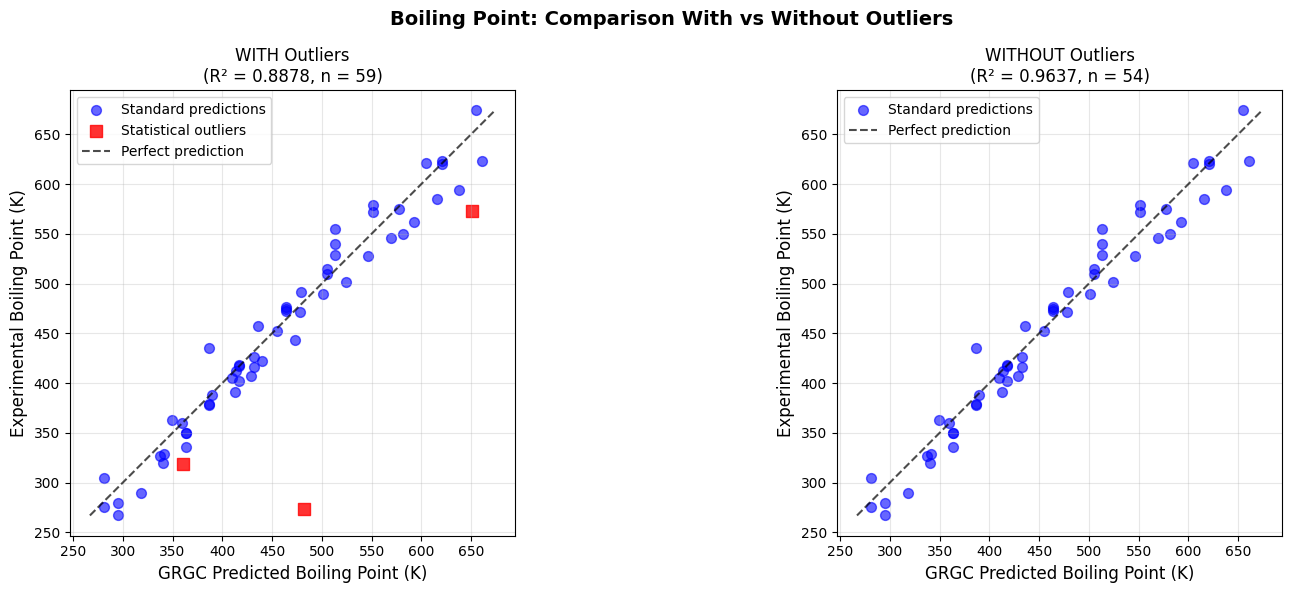


Melting Point R² Improvement: +0.0758


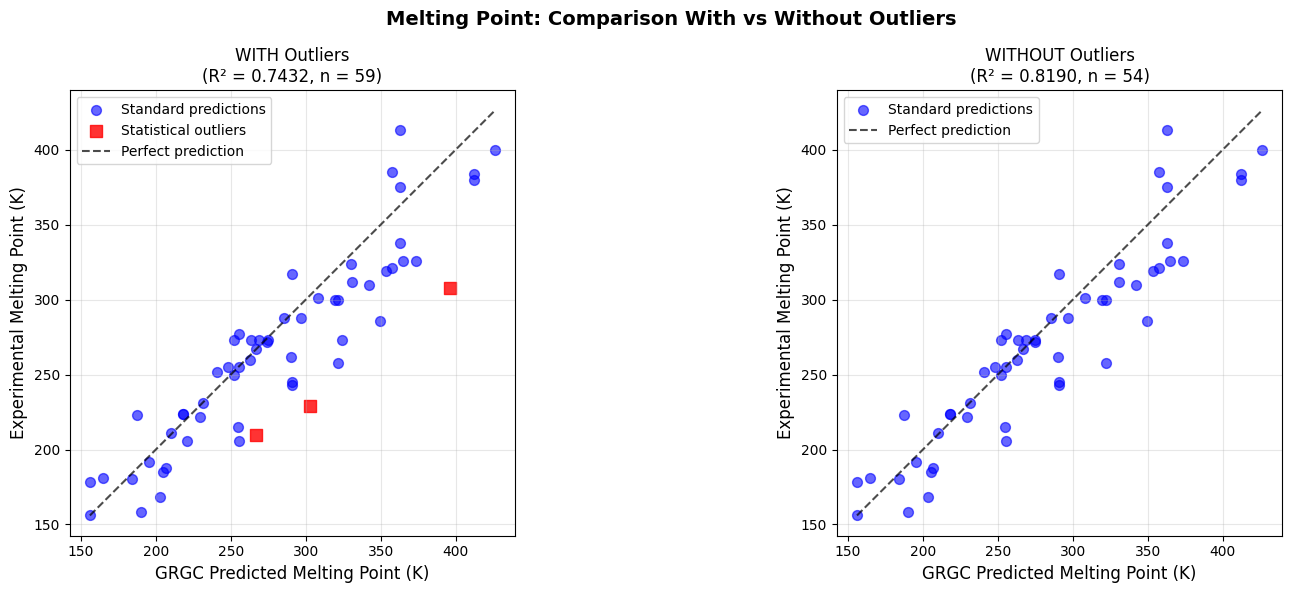


DETAILED STATISTICAL COMPARISON: ORIGINAL vs CLEANED DATA

Boiling Point Detailed Analysis:
--------------------------------------------------
  Dataset Size:
    Original: 59 compounds
    Cleaned:  54 compounds
    Removed:  5 compounds
  R² Values:
    Original: 0.8878
    Cleaned:  0.9637
    Change:   +0.0759
  MAE Values:
    Original: 21.2388
    Cleaned:  16.2374
    Change:   -5.0014
  RMSE Values:
    Original: 35.4835
    Cleaned:  20.0162
    Change:   -15.4673
  MAPE Values:
    Original: 5.31%
    Cleaned:  3.68%
    Change:   -1.62%

Melting Point Detailed Analysis:
--------------------------------------------------
  Dataset Size:
    Original: 59 compounds
    Cleaned:  54 compounds
    Removed:  5 compounds
  R² Values:
    Original: 0.7432
    Cleaned:  0.8190
    Change:   +0.0758
  MAE Values:
    Original: 24.0195
    Cleaned:  20.9822
    Change:   -3.0373
  RMSE Values:
    Original: 31.5877
    Cleaned:  27.0892
    Change:   -4.4985
  MAPE Values:
    Origina

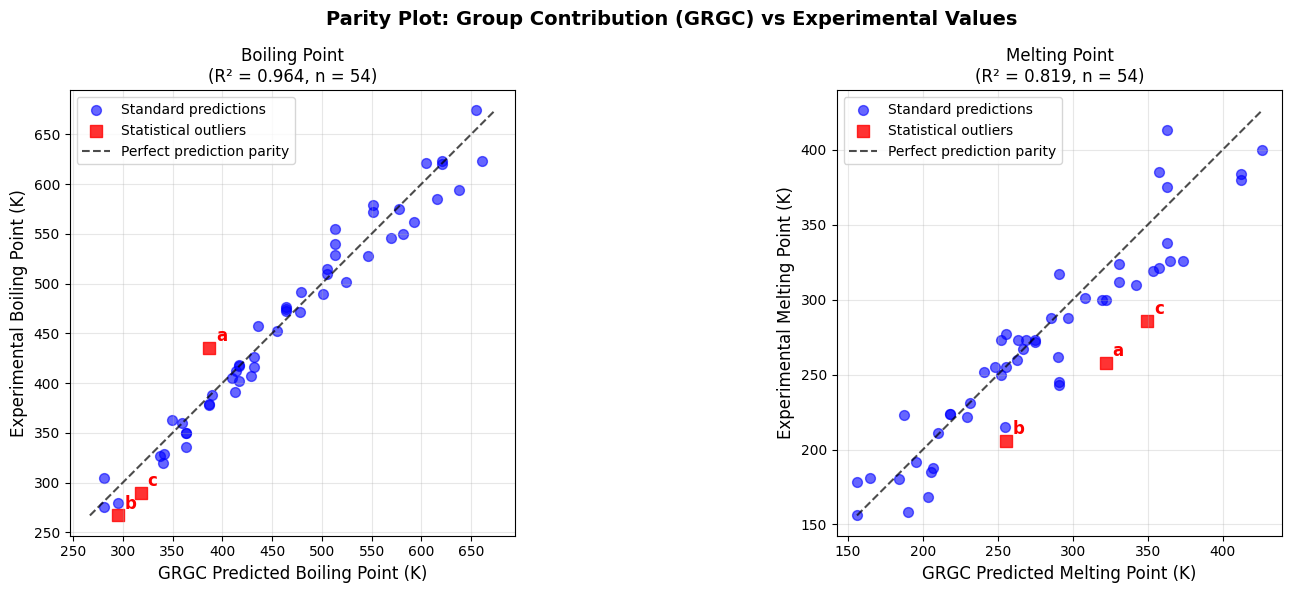


Thermophysical Property Outlier Analysis (Top 4 deviations per property):

Boiling Point Prediction Outliers:
  a: CCCN(CCC)...
     GRGC: 387.05, Experimental: 435.00, Error: 11.0%
  b: CN...
     GRGC: 295.01, Experimental: 267.00, Error: 10.5%
  c: CCN...
     GRGC: 317.89, Experimental: 290.00, Error: 9.6%

Melting Point Prediction Outliers:
  a: c1ccc2ncccc2c1...
     GRGC: 321.85, Experimental: 258.00, Error: 24.7%
  b: CC1=CC=CC=N1...
     GRGC: 255.34, Experimental: 206.00, Error: 24.0%
  c: c1ccc(cc1)Cc2ccccn2...
     GRGC: 349.38, Experimental: 286.00, Error: 22.2%


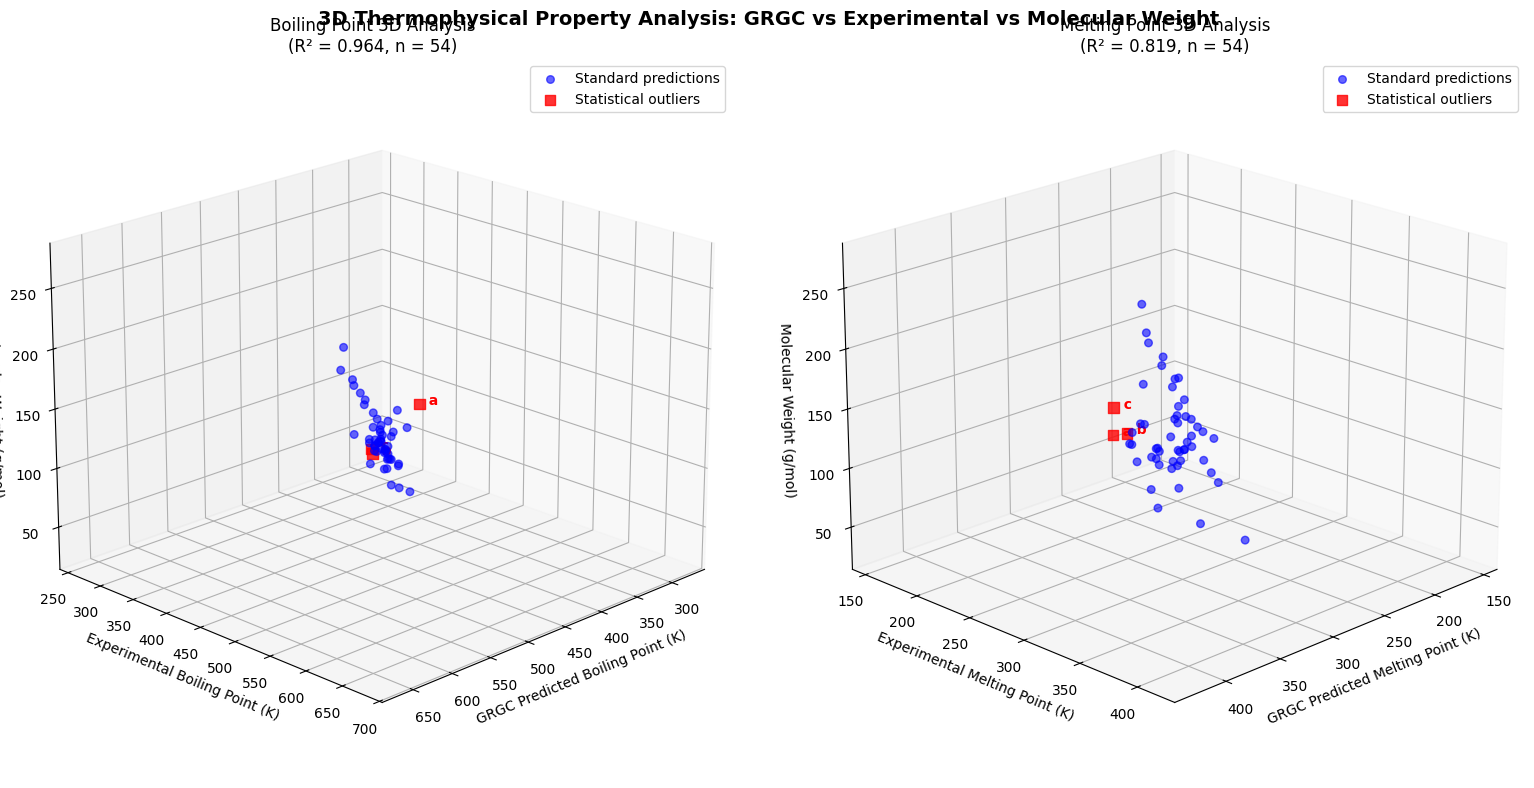


Comprehensive Thermophysical Property Prediction Analysis:

Boiling Point Prediction Statistics:
  Number of molecular compounds: 54
  Coefficient of determination (R²): 0.9637
  Mean absolute error (MAE): 16.2374
  Root mean square error (RMSE): 20.0162
  Mean absolute percentage error (MAPE): 3.68%
  GRGC prediction range: 280.68 - 661.09
  Experimental range: 267.00 - 674.00

Melting Point Prediction Statistics:
  Number of molecular compounds: 54
  Coefficient of determination (R²): 0.8190
  Mean absolute error (MAE): 20.9822
  Root mean square error (RMSE): 27.0892
  Mean absolute percentage error (MAPE): 7.97%
  GRGC prediction range: 156.04 - 426.28
  Experimental range: 156.00 - 413.00


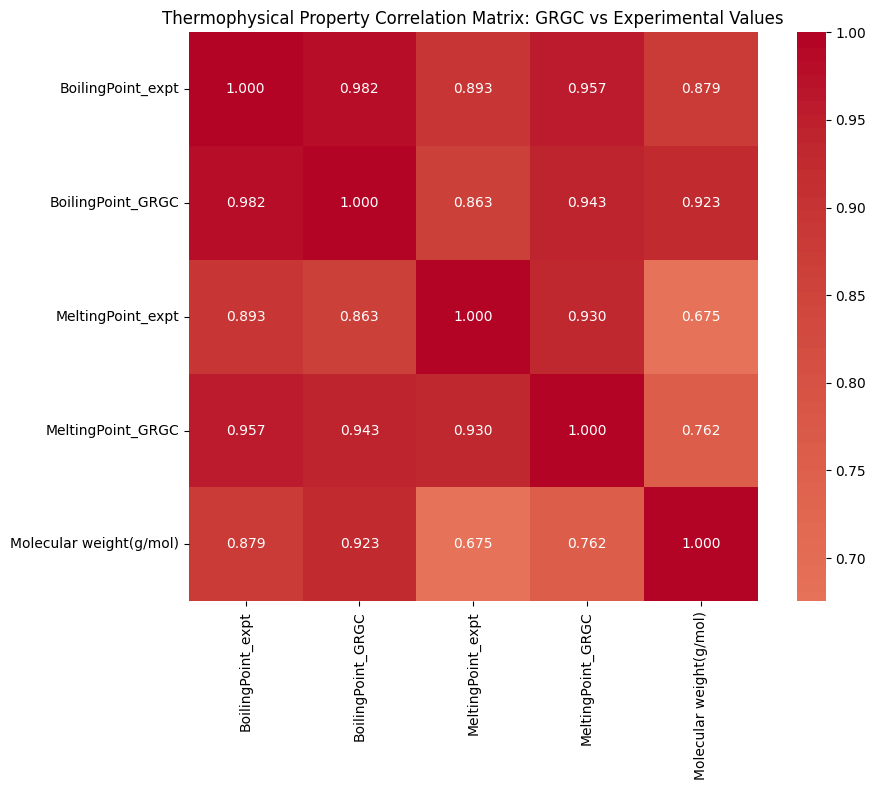

In [ ]:
def removeStatisticalOutliersAndAnalyze(thermophysicalDataFrame, errorPercentileThreshold=95):
    """
    Remove statistical outliers and perform analysis on cleaned dataset

    Parameters:
    -----------
    thermophysicalDataFrame : pandas.DataFrame
        Original dataframe with outliers
    errorPercentileThreshold : float
        Percentile threshold for outlier identification (default: 95th percentile)

    Returns:
    --------
    cleanedDataFrame : pandas.DataFrame
        DataFrame with outliers removed
    """
    thermophysicalProperties = [
        ('BoilingPoint_expt', 'BoilingPoint_GRGC', 'Boiling Point'),
        ('MeltingPoint_expt', 'MeltingPoint_GRGC', 'Melting Point')
    ]

    print("Statistical Outlier Removal Analysis:")
    print("="*60)

    # Create a copy of the original dataframe
    cleanedDataFrame = thermophysicalDataFrame.copy()
    originalSize = len(cleanedDataFrame)

    outliers_to_remove = set()  # Use set to avoid duplicate indices

    for databaseColumn, groupContributionColumn, propertyName in thermophysicalProperties:
        # Get valid data for this property
        validPropertyMask = (cleanedDataFrame[databaseColumn].notna() &
                           cleanedDataFrame[groupContributionColumn].notna())

        if validPropertyMask.sum() == 0:
            print(f"\n{propertyName}: No valid data for outlier analysis")
            continue

        validPropertyData = cleanedDataFrame[validPropertyMask]

        # Calculate R² before outlier removal
        r2_before = r2_score(validPropertyData[databaseColumn],
                           validPropertyData[groupContributionColumn])

        # Identify outliers
        outlierMask, relativeErrors = identifyStatisticalOutliers(
            validPropertyData, databaseColumn, groupContributionColumn, errorPercentileThreshold
        )

        # Get indices of outliers
        outlier_indices = validPropertyData[outlierMask].index.tolist()
        outliers_to_remove.update(outlier_indices)

        # Calculate statistics
        outlier_count = outlierMask.sum()
        outlier_percentage = (outlier_count / len(validPropertyData)) * 100

        print(f"\n{propertyName} Outlier Analysis:")
        print(f"  Valid data points: {len(validPropertyData)}")
        print(f"  Outliers identified: {outlier_count} ({outlier_percentage:.1f}%)")
        print(f"  R² before removal: {r2_before:.4f}")

        if outlier_count > 0:
            # Calculate R² after removing outliers for this property only
            non_outlier_data = validPropertyData[~outlierMask]
            r2_after = r2_score(non_outlier_data[databaseColumn],
                              non_outlier_data[groupContributionColumn])
            improvement = r2_after - r2_before
            print(f"  R² after removal: {r2_after:.4f}")
            print(f"  R² improvement: {improvement:+.4f}")

    # Remove all identified outliers
    cleanedDataFrame = cleanedDataFrame.drop(index=list(outliers_to_remove))

    finalSize = len(cleanedDataFrame)
    totalOutliersRemoved = originalSize - finalSize
    totalOutlierPercentage = (totalOutliersRemoved / originalSize) * 100

    print(f"\nOverall Outlier Removal Summary:")
    print(f"  Original dataset size: {originalSize}")
    print(f"  Final dataset size: {finalSize}")
    print(f"  Total outliers removed: {totalOutliersRemoved} ({totalOutlierPercentage:.1f}%)")

    return cleanedDataFrame

def plotComparisonWithAndWithoutOutliers(originalDataFrame, cleanedDataFrame):
    """
    Create side-by-side comparison plots showing data with and without outliers

    Parameters:
    -----------
    originalDataFrame : pandas.DataFrame
        Original dataframe with outliers
    cleanedDataFrame : pandas.DataFrame
        Cleaned dataframe without outliers
    """
    thermophysicalProperties = [
        ('BoilingPoint_expt', 'BoilingPoint_GRGC', 'Boiling Point', 'K'),
        ('MeltingPoint_expt', 'MeltingPoint_GRGC', 'Melting Point', 'K')
    ]

    for databaseColumn, groupContributionColumn, propertyName, propertyUnit in thermophysicalProperties:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f'{propertyName}: Comparison With vs Without Outliers',
                     fontsize=14, fontweight='bold')

        # Plot 1: Original data with outliers highlighted
        validOriginalMask = (originalDataFrame[databaseColumn].notna() &
                           originalDataFrame[groupContributionColumn].notna())

        if validOriginalMask.sum() > 0:
            validOriginalData = originalDataFrame[validOriginalMask]

            # Identify outliers in original data
            outlierMask, _ = identifyStatisticalOutliers(validOriginalData,
                                                       databaseColumn,
                                                       groupContributionColumn)

            # Plot normal points
            normalMask = ~outlierMask
            ax1.scatter(validOriginalData[normalMask][groupContributionColumn],
                       validOriginalData[normalMask][databaseColumn],
                       alpha=0.6, s=50, c='blue', label='Standard predictions')

            # Plot outliers
            if outlierMask.sum() > 0:
                ax1.scatter(validOriginalData[outlierMask][groupContributionColumn],
                           validOriginalData[outlierMask][databaseColumn],
                           alpha=0.8, s=80, c='red', marker='s', label='Statistical outliers')

            # Perfect prediction line
            min_val1 = min(validOriginalData[groupContributionColumn].min(),
                          validOriginalData[databaseColumn].min())
            max_val1 = max(validOriginalData[groupContributionColumn].max(),
                          validOriginalData[databaseColumn].max())
            ax1.plot([min_val1, max_val1], [min_val1, max_val1],
                    'k--', alpha=0.7, label='Perfect prediction')

            # Calculate R² for original data
            r2_original = r2_score(validOriginalData[databaseColumn],
                                 validOriginalData[groupContributionColumn])

            ax1.set_title(f'WITH Outliers\n(R² = {r2_original:.4f}, n = {len(validOriginalData)})')

        # Plot 2: Cleaned data without outliers
        validCleanedMask = (cleanedDataFrame[databaseColumn].notna() &
                          cleanedDataFrame[groupContributionColumn].notna())

        if validCleanedMask.sum() > 0:
            validCleanedData = cleanedDataFrame[validCleanedMask]

            ax2.scatter(validCleanedData[groupContributionColumn],
                       validCleanedData[databaseColumn],
                       alpha=0.6, s=50, c='blue', label='Standard predictions')

            # Perfect prediction line
            min_val2 = min(validCleanedData[groupContributionColumn].min(),
                          validCleanedData[databaseColumn].min())
            max_val2 = max(validCleanedData[groupContributionColumn].max(),
                          validCleanedData[databaseColumn].max())
            ax2.plot([min_val2, max_val2], [min_val2, max_val2],
                    'k--', alpha=0.7, label='Perfect prediction')

            # Calculate R² for cleaned data
            r2_cleaned = r2_score(validCleanedData[databaseColumn],
                                validCleanedData[groupContributionColumn])

            ax2.set_title(f'WITHOUT Outliers\n(R² = {r2_cleaned:.4f}, n = {len(validCleanedData)})')

            # Print improvement
            if validOriginalMask.sum() > 0:
                improvement = r2_cleaned - r2_original
                print(f"\n{propertyName} R² Improvement: {improvement:+.4f}")

        # Formatting for both plots
        for ax in [ax1, ax2]:
            ax.set_xlabel(f'GRGC Predicted {propertyName} ({propertyUnit})', fontsize=12)
            ax.set_ylabel(f'Experimental {propertyName} ({propertyUnit})', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.legend()
            ax.set_aspect('equal', adjustable='box')

        plt.tight_layout()
        plt.show()

def performComprehensiveOutlierAnalysis(originalDataFrame, errorPercentileThreshold=95):
    """
    Perform comprehensive analysis comparing original vs cleaned data

    Parameters:
    -----------
    originalDataFrame : pandas.DataFrame
        Original dataframe with outliers
    errorPercentileThreshold : float
        Percentile threshold for outlier identification

    Returns:
    --------
    cleanedDataFrame : pandas.DataFrame
        Cleaned dataframe without outliers
    """
    # Remove outliers
    cleanedDataFrame = removeStatisticalOutliersAndAnalyze(originalDataFrame, errorPercentileThreshold)

    # Create comparison plots
    plotComparisonWithAndWithoutOutliers(originalDataFrame, cleanedDataFrame)

    # Perform detailed statistical analysis comparison
    print("\n" + "="*80)
    print("DETAILED STATISTICAL COMPARISON: ORIGINAL vs CLEANED DATA")
    print("="*80)

    thermophysicalProperties = [
        ('BoilingPoint_expt', 'BoilingPoint_GRGC', 'Boiling Point'),
        ('MeltingPoint_expt', 'MeltingPoint_GRGC', 'Melting Point')
    ]

    for databaseColumn, groupContributionColumn, propertyName in thermophysicalProperties:
        print(f"\n{propertyName} Detailed Analysis:")
        print("-" * 50)

        # Original data analysis
        validOriginalMask = (originalDataFrame[databaseColumn].notna() &
                           originalDataFrame[groupContributionColumn].notna())

        # Cleaned data analysis
        validCleanedMask = (cleanedDataFrame[databaseColumn].notna() &
                          cleanedDataFrame[groupContributionColumn].notna())

        if validOriginalMask.sum() > 0 and validCleanedMask.sum() > 0:
            validOriginalData = originalDataFrame[validOriginalMask]
            validCleanedData = cleanedDataFrame[validCleanedMask]

            # Calculate metrics for original data
            r2_orig = r2_score(validOriginalData[databaseColumn], validOriginalData[groupContributionColumn])
            mae_orig = np.mean(np.abs(validOriginalData[databaseColumn] - validOriginalData[groupContributionColumn]))
            rmse_orig = np.sqrt(np.mean((validOriginalData[databaseColumn] - validOriginalData[groupContributionColumn])**2))
            mape_orig = np.mean(np.abs((validOriginalData[databaseColumn] - validOriginalData[groupContributionColumn]) / validOriginalData[databaseColumn])) * 100

            # Calculate metrics for cleaned data
            r2_clean = r2_score(validCleanedData[databaseColumn], validCleanedData[groupContributionColumn])
            mae_clean = np.mean(np.abs(validCleanedData[databaseColumn] - validCleanedData[groupContributionColumn]))
            rmse_clean = np.sqrt(np.mean((validCleanedData[databaseColumn] - validCleanedData[groupContributionColumn])**2))
            mape_clean = np.mean(np.abs((validCleanedData[databaseColumn] - validCleanedData[groupContributionColumn]) / validCleanedData[databaseColumn])) * 100

            # Display comparison
            print(f"  Dataset Size:")
            print(f"    Original: {len(validOriginalData)} compounds")
            print(f"    Cleaned:  {len(validCleanedData)} compounds")
            print(f"    Removed:  {len(validOriginalData) - len(validCleanedData)} compounds")

            print(f"  R² Values:")
            print(f"    Original: {r2_orig:.4f}")
            print(f"    Cleaned:  {r2_clean:.4f}")
            print(f"    Change:   {r2_clean - r2_orig:+.4f}")

            print(f"  MAE Values:")
            print(f"    Original: {mae_orig:.4f}")
            print(f"    Cleaned:  {mae_clean:.4f}")
            print(f"    Change:   {mae_clean - mae_orig:+.4f}")

            print(f"  RMSE Values:")
            print(f"    Original: {rmse_orig:.4f}")
            print(f"    Cleaned:  {rmse_clean:.4f}")
            print(f"    Change:   {rmse_clean - rmse_orig:+.4f}")

            print(f"  MAPE Values:")
            print(f"    Original: {mape_orig:.2f}%")
            print(f"    Cleaned:  {mape_clean:.2f}%")
            print(f"    Change:   {mape_clean - mape_orig:+.2f}%")

    return cleanedDataFrame

def plotCleanedDataAnalysis(cleanedDataFrame):
    """
    Generate all analysis plots for the cleaned dataframe without outliers

    Parameters:
    -----------
    cleanedDataFrame : pandas.DataFrame
        Cleaned dataframe without outliers
    """
    print("\nGenerating Analysis for Cleaned Data (Without Outliers):")
    print("="*60)

    # Generate 2D parity plots for cleaned data
    plotGroupContributionVsDatabaseComparison(cleanedDataFrame)

    # Generate 3D visualization for cleaned data
    plotThreeDimensionalPropertyComparison(cleanedDataFrame)

    # Perform statistical analysis for cleaned data
    performThermophysicalPropertyAnalysis(cleanedDataFrame)

    # Generate correlation matrix for cleaned data
    generatePropertyCorrelationMatrix(cleanedDataFrame)

# Main function to run complete outlier analysis
def runOutlierAnalysisWorkflow(originalDataFrame, errorPercentileThreshold=95):
    """
    Complete workflow for outlier analysis and comparison

    Parameters:
    -----------
    originalDataFrame : pandas.DataFrame
        Original dataframe with potential outliers
    errorPercentileThreshold : float
        Percentile threshold for outlier identification (default: 95%)

    Returns:
    --------
    cleanedDataFrame : pandas.DataFrame
        Cleaned dataframe without outliers
    """
    print("COMPLETE OUTLIER ANALYSIS WORKFLOW")
    print("="*50)

    # Step 1: Comprehensive outlier analysis and removal
    cleanedDataFrame = performComprehensiveOutlierAnalysis(originalDataFrame, errorPercentileThreshold)

    # Step 2: Generate all plots and analysis for cleaned data
    plotCleanedDataAnalysis(cleanedDataFrame)

    return cleanedDataFrame



# Option 1: Quick outlier removal and R² comparison
cleanedDataFrame = removeStatisticalOutliersAndAnalyze(processedEngTboxDF)

# Option 2: Complete analysis workflow
cleanedDataFrame = runOutlierAnalysisWorkflow(processedEngTboxDF)

# Option 3: Custom threshold
# cleanedDataFrame = runOutlierAnalysisWorkflow(processedEngTboxDF, errorPercentileThreshold=90)

# -*- coding: utf-8 -*-
"""
Script to train a GP on physicochemical properties.

In [ ]:
! pip install scikit-multilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
! pip install gpflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4

In [ ]:
import os
import warnings
import time

# Specific
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
import gpflow
from gpflow.utilities import print_summary, set_trainable, deepcopy
import tensorflow as tf
from tensorflow_probability import bijectors as tfb
from matplotlib import pyplot as plt


# =============================================================================
# Auxiliary Functions
# =============================================================================

In [ ]:
def set_white_exp_95CI(code):
    """
    Sets the estimated average ~95% confidence interval on labels using the property code

    Parameters:
    code : string
        Property code

    Returns:
    exp_95CI : float
    """
    if code == 'Tb':
        exp_95CI = 10.0
    elif code == 'Tm':
        exp_95CI = 5.0
    elif code == 'Hvap':
        exp_95CI = 1.0
    elif code == 'Vc':
        exp_95CI = 25.0
    elif code == 'Tc':
        exp_95CI = 5.0
    elif code == 'Pc':
        exp_95CI = 30.0
    return exp_95CI



def gpConfig_from_method(method_number, code, kernel = 'RBF', anisotropic = False, useWhiteKernel = True, trainLikelihood = True, opt_method = 'L-BFGS-B'):
    """
    Creates a gpConfig dictionary based on the method number.

    Parameters:
    method_number : int
        Method number.

    Returns:
    gpConfig : dictionary
        Dictionary of GP configuration parameters.

    Note:
    method_number is used to define which type of gp model to use
    1: Y = GP(0, K(Mw, Y_gc))
    2: Y - Y_gc = GP(0, K(Mw))
    3: Y - Y_gc = GP(0, K(Mw, Y_gc))
    4: Y = GP(Y_gc, K(Mw, Y_gc))
    5: Y = GP(AMw + BY_gc + c, K(Mw, Y_gc))
    """
    gpConfig={'kernel': kernel,
           'useWhiteKernel':useWhiteKernel,
           'trainLikelihood':trainLikelihood,
           'opt_method':opt_method,
           'anisotropic':anisotropic}
    if method_number == 1:
        gpConfig['mean_function']='Zero'
        gpConfig['Name']='y_exp = GP(0, K(x1,x2))'
        gpConfig['SaveName']='model_1'
    if method_number == 2:
        gpConfig['mean_function']='Zero'
        gpConfig['Name']='y_exp = y_GC + GP(0, K(x1))'
        gpConfig['SaveName']='model_2'
    if method_number == 3:
        gpConfig['mean_function']='Constant'
        gpConfig['Name']='y_exp = GP(y_GC, K(x1,x2))'
        gpConfig['SaveName']='model_3'
    if method_number == 4:
        gpConfig['mean_function']='Linear'
        gpConfig['Name']='y_exp = GP(B@X, K(x1,x2))'
        gpConfig['SaveName']='model_4'
    else:
        if method_number not in [1 , 2, 3, 4]:
            raise ValueError('invalid method number input')
    return gpConfig


def get_gp_data(X, Y, method_number):
    """
    Gets X and Y data to train GP based on the method number

    Parameters:
    X : numpy array
        Features data.
    Y : numpy array
        Property data.
    method_number : int
        Method number

    Returns:
    X_gp : numpy array
        Features data to train GP.
    Y_gp: numpy array
        Data to train GP.
    Y_gc: numpy array
        Data from Joback method
    """
    if method_number == 2:
        X_gp = X[:,0].reshape(-1,1)
    else:
        X_gp = X
    if method_number == 2:
        Y_gp = Y - X[:,1]
    else:
        Y_gp = Y
    Y_gp = Y_gp.reshape(-1,1)
    Y_gc = X[:,1].reshape(-1,1)
    return X_gp, Y_gp, Y_gc


def discrepancy_to_property(method_number, y_pred, y_gc, idx):
    """
    Adds discrepancy to property based on the method number
    Parameters:
    method_number : int
        Method number
    y_pred : numpy array
        GP predicted output
    y_gc : numpy array
        Predicted GC method results
    idx : np.array
        Index of the y_gc to be added to y_pred

    Returns:
    y_prop : numpy array
        Predicted property value
    """
    if method_number == 2:
        y_prop = y_pred + y_gc[idx.flatten(),:]
    else:
        y_prop = y_pred
    return y_prop

def stratifyvector(Y):
    """
    Creates a stratified vector based on the label data Y

    Parameters:
    Y : numpy array
        label data
    Returns:
    stratifyVector : numpy array
        Stratified vector
    """
    # Iterate over number of bins, trying to find the larger number of bins that
    # guarantees at least 5 values per bin
    for n in range(1,100):
        # Bin Y using n bins
        stratifyVector=pd.cut(Y,n,labels=False)
        # Define isValid (all bins have at least 5 values)
        isValid=True
        # Check that all bins have at least 5 values
        for k in range(n):
            if np.count_nonzero(stratifyVector==k)<5:
                isValid=False
        #If isValid is false, n is too large; nBins must be the previous iteration
        if not isValid:
            nBins=n-1
            break
    # Generate vector for stratified splitting based on labels
    stratifyVector=pd.cut(Y,nBins,labels=False)
    return stratifyVector

def normalize(inputArray,skScaler=None,method='Standardization',reverse=False):
    """
    normalize() normalizes (or unnormalizes) inputArray using the method
    specified and the skScaler provided.

    Parameters
    ----------
    inputArray : numpy array
        Array to be normalized. If dim>1, array is normalized column-wise.
    skScaler : scikit-learn preprocessing object or None
        Scikit-learn preprocessing object previosly fitted to data. If None,
        the object is fitted to inputArray.
        Default: None
    method : string, optional
        Normalization method to be used.
        Methods available:
            . Standardization - classic standardization, (x-mean(x))/std(x)
            . MinMax - scale to range (0,1)
            . LogStand - standardization on the log of the variable,
                         (log(x)-mean(log(x)))/std(log(x))
            . Log+bStand - standardization on the log of variables that can be
                           zero; uses a small buffer,
                           (log(x+b)-mean(log(x+b)))/std(log(x+b))
        Default: 'Standardization'
    reverse : bool
        Whether  to normalize (False) or unnormalize (True) inputArray.
        Defalt: False

    Returns
    -------
    inputArray : numpy array
        Normalized (or unnormalized) version of inputArray.
    skScaler : scikit-learn preprocessing object
        Scikit-learn preprocessing object fitted to inputArray. It is the same
        as the inputted skScaler, if it was provided.

    """
    # If inputArray is a labels vector of size (N,), reshape to (N,1)
    if inputArray.ndim==1:
        inputArray=inputArray.reshape((-1,1))
        warnings.warn('Input to normalize() was of shape (N,). It was assumed'\
                      +' to be a column array and converted to a (N,1) shape.')
    # If skScaler is None, train for the first time
    if method == 'None':
        inputArray=inputArray
        skScaler = None
    else:
        if skScaler is None:
            # Check method
            if method=='Standardization' or method=='MinMax': aux=inputArray
            elif method=='LogStand': aux=np.log(inputArray)
            elif method=='Log+bStand': aux=np.log(inputArray+10**-3)
            else: raise ValueError('Could not recognize method in normalize().')
            if method!='MinMax':
                skScaler=preprocessing.StandardScaler().fit(aux)
            else:
                skScaler=preprocessing.MinMaxScaler().fit(aux)
        # Do main operation (normalize or unnormalize)
        if reverse:
            # Rescale the data back to its original distribution
            inputArray=skScaler.inverse_transform(inputArray)
            # Check method
            if method=='LogStand': inputArray=np.exp(inputArray)
            elif method=='Log+bStand': inputArray=np.exp(inputArray)-10**-3
        elif not reverse:
            # Check method
            if method=='Standardization' or method=='MinMax': aux=inputArray
            elif method=='LogStand': aux=np.log(inputArray)
            elif method=='Log+bStand': aux=np.log(inputArray+10**-3)
            else: raise ValueError('Could not recognize method in normalize().')
            inputArray=skScaler.transform(aux)
    # Return
    return inputArray,skScaler



# Build GPR model function with bounded hyperparameters
def build_model_with_bounded_params(X, Y, kern, low, high, \
                                    high_alpha, init_val1, init_val2, init_val3, \
                                    useWhite, trainLikelihood, anisotropic, typeMeanFunc):
    """
    build_model_with_bounded_params(*) creates a GP model object with bounded hyperparameters and initial
    values

    Parameters
    ----------
    X : numpy array
        Feature data
    Y : numpy array
        Label data
    low : float
        lower bound on all hyperparameters
    high : float
        upper bound on all hyperparameters except alpha for the RQ kernel
    high_alpha : float
        upper bound on alpha hyperparameter for the RQ kernel
    init_val1 : float
        initial values for first length scale and alpha parameter
    init_val2 : float
        initial values for second length scale for anisotropic kernels
        for isotropic kernels, only one initial value (init_val1) is used
    init_val1 : float
        initial values for variance or scale hyperparameter of kernel 1 (not Whitenoise kernel)

    Returns
    -------
    model : Gpflow model object
        GP model object with bounded hyperparameters and initial values

    """

    low = tf.cast(low, dtype=tf.float64)
    high = tf.cast(high, dtype=tf.float64)
    high_alpha = tf.cast(high_alpha, dtype=tf.float64)
    init_val1 = tf.cast(init_val1, dtype=tf.float64)
    init_val2 = tf.cast(init_val2, dtype=tf.float64)
    init_val3 = tf.cast(init_val3, dtype=tf.float64)
    if anisotropic == True:
        lsc = gpflow.Parameter([init_val1, init_val2], transform=tfb.Sigmoid(low , high), dtype=tf.float64)
    else:
        lsc = gpflow.Parameter(init_val1, transform=tfb.Sigmoid(low , high), dtype=tf.float64)
    alf = gpflow.Parameter(init_val1, transform=tfb.Sigmoid(low , high_alpha), dtype=tf.float64)
    var = gpflow.Parameter(init_val3, transform=tfb.Sigmoid(low , high), dtype=tf.float64)
    if kern == "RQ":
        kernel_ = gpflow.kernels.RationalQuadratic()
        kernel_.alpha = alf
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "RBF":
        kernel_ = gpflow.kernels.RBF()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "Matern12":
        kernel_ = gpflow.kernels.Matern12()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "Matern32":
        kernel_ = gpflow.kernels.Matern32()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    elif kern == "Matern52":
        kernel_ = gpflow.kernels.Matern52()
        kernel_.lengthscales = lsc
        kernel_.variance = var
    if useWhite == True:
        #white_var = np.array(np.random.uniform(0.05, 1.0))
        final_kernel = kernel_+gpflow.kernels.White(variance=1.0)
    else:
        final_kernel = kernel_

    if typeMeanFunc == 'Zero':
        mf = None
    if typeMeanFunc == 'Constant':
        #If constant value is selected but no value is given, default to zero mean
        mf_val = np.array([0,1]).reshape(-1,1)
        mf = gpflow.functions.Linear(mf_val)
    if typeMeanFunc == 'Linear':
        A = np.ones((X.shape[1],1))
        mf = gpflow.functions.Linear(A)
    model_ = gpflow.models.GPR(data=(X, Y), kernel=final_kernel, mean_function=mf, noise_variance=10**-5)
    if typeMeanFunc == 'Constant':
        gpflow.set_trainable(model_.mean_function.A, False)
        gpflow.set_trainable(model_.mean_function.b, False)
    gpflow.utilities.set_trainable(model_.likelihood.variance,trainLikelihood)
    model = model_
    return model



def train_gp(X_Train, Y_Train, gpConfig, code, sc_y, featurenorm, retrain_GP, retrain_count):
    """
    Trains the GP given training data.


    """

    # Train the model multiple times and keep track of the model with the lowest minimum training loss
    best_minimum_loss = float('inf')
    best_model = None
    best_model_pretrain = None
    best_model_success = False
    best_condition_num = float('inf')
    args = (X_Train, Y_Train, gpConfig)

    retrain_GP = int(retrain_GP)
    retrain_count = retrain_count
    for i in range(retrain_GP):
        model, aux, condition_number, obj_func, opt_success, retrain_count, model_pretrain = \
            buildGP(X_Train_N, Y_Train_N, gpConfig, code, featureNorm, retrain_count) # Fixed: Pass correct variables
        print(f"training_loss = {obj_func}")
        print(f"condition_number = {condition_number}")
        retrain_count += 1
        if best_minimum_loss > obj_func and opt_success==True:
            best_minimum_loss = obj_func
            best_model = model
            best_model_pretrain = model_pretrain
            best_model_success = opt_success
            best_condition_num = condition_number
    if best_model_success == False:
        warnings.warn('GP optimizer failed to converge with retrains')

    #Put hyperparameters in a list
    trained_hyperparams = gpflow.utilities.read_values(best_model)

    if sc_y != None:
        sc_y_scale = sc_y.scale_
    else:
        sc_y_scale = None

    return best_model,best_minimum_loss,best_model_success,best_condition_num,trained_hyperparams,best_model_pretrain,sc_y_scale


def gpPredict(model,X):
    """
    gpPredict() returns the prediction and variance of the GP model
    on the X data provided.

    Parameters
    ----------
    model : gpflow.models.gpr.GPR object
        GP model.
    X : numpy array (N,K)
        Training features, where N is the number of data points and K is the
        number of independent features (e.g., sigma profile bins).

    Returns
    -------
    Y : numpy array (N,1)
        GP predictions.
    STD : numpy array (N,1)
        GP standard deviations.

    """
    # Do GP prediction, obtaining mean and variance
    GP_Mean,GP_Var=model.predict_f(X)
    # Convert to numpy
    GP_Mean=GP_Mean.numpy()
    GP_Var=GP_Var.numpy()
    # Prepare outputs
    Y=GP_Mean
    VAR=GP_Var
    # Output
    return Y,VAR




def count_outside_95(Y_Train, Y_Test, Y_Train_Pred, Y_Test_Pred, Y_Train_CI, Y_Test_CI):
    """
    count_outside_95() finds the number and fraction of predicted data that are outside the predicted 95%
        confidence intervals from the true values

    Parameters:
    Y_Train_CI : numpy array
        Absolute values of the 95% confidence interval on the predictions on training set
    Y_Test_CI : numpy array
        Absolute values of the 95% confidence interval on the predictions on testing set

    """
    out_95_train = []
    out_95_test = []
    for index, value in enumerate(Y_Train):
        if np.abs(value - Y_Train_Pred[index]) > Y_Train_CI[index]:
            out_95_train.append(index)
    num_out95_train = len(out_95_train)
    frac_out95_train = num_out95_train/len(Y_Train)
    for index, value in enumerate(Y_Test):
        if np.abs(value - Y_Test_Pred[index]) > Y_Test_CI[index]:
            out_95_test.append(index)
    num_out95_test = len(out_95_test)
    frac_out95_test = num_out95_test/len(Y_Test)

    return num_out95_train, frac_out95_train, num_out95_test, frac_out95_test



# =============================================================================
#######################################

# GP training and property predictions

#######################################
# =============================================================================

# =============================================================================
# Configuration
# =============================================================================
#Model data is found based on method number

dbPath="/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/" # Fixed: Set correct path
# Property Code
code='Hvap' # 'Hvap', 'Vc', 'Pc', 'Tc', 'Tb', 'Tm'

kernel = 'RQ' # Options: RQ, RBF, Matern12, Matern32, Matern52
anisotropic = False
opt_method = 'L-BFGS-B' # Options: L-BFGS-B, BFGS
useWhiteKernel = True
trainLikelihood = False
retrain_GP = 10
method_number = 3

# Define normalization methods
if method_number == 2:
    featureNorm, labelNorm = 'None', 'None'
else:
    featureNorm, labelNorm = 'Standardization', 'Standardization'


seed = 42
np.random.seed(seed)

# GP Configuration
gpConfig= gpConfig_from_method(method_number, code, kernel, anisotropic, useWhiteKernel, trainLikelihood, opt_method)

# =============================================================================
# Main Script
# =============================================================================

# Iniate timer
ti=time.time()

# Load data
db=pd.read_csv(os.path.join(dbPath,code+'_prediction_data_fcl.csv'))
db=db.dropna()
X=db.iloc[:,2:-1].copy().to_numpy('float')
data_names=db.columns.tolist()[2:]
Y=db.iloc[:,-1].copy().to_numpy('float')
Y = Y.reshape(-1,1)
Y_gc = X[:,-1].reshape(-1,1)
MW = X[:,-2].reshape(-1,1)

# >>>>>>>>>  Stratification based on features <<<<<<<<<<<<<<<<<<<<<<<<<<<<
# >>>>>>>>>>>>>>>>>>>>>>>>>>  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# X_stratify = X[:,0:]
# indices = np.arange(X.shape[0])
# Y_stratify = np.column_stack((indices, Y))
# X_Train_0, Y_Train_0, X_Test_0, Y_Test_0 = \
#                  iterative_train_test_split(X_stratify, Y_stratify, test_size = 0.2)

X_data = db.iloc[:,2:-1].copy()
num_rows_X = X_data.shape[0]
y_data_dum = (np.ones((num_rows_X, 2))).astype(int)
indices = np.arange(X_data.shape[0])
y_stratify = np.column_stack((indices, y_data_dum))
X_stratify = X_data.values

X_ = np.array(y_stratify)
y_ = np.array(X_stratify)
y_strat = y_
X_strat = X_

seed = 42
np.random.seed(seed)

X_Train_0, y_Train_0, X_valTest_0, y_valTest_0 = iterative_train_test_split(X_strat, y_strat, test_size = 0.2)

train_indices = (X_Train_0[:,0]).astype(int)
test_indices = (X_valTest_0[:,0]).astype(int)


trn_idx = train_indices
test_idx = test_indices

X_Train_0 = X[trn_idx, :]
X_Test_0 = X[test_idx, :]
Y_Train_0 = Y[trn_idx, :]
Y_Test_0 = Y[test_idx, :]

X_Train, Y_Train, Y_gc_Train = get_gp_data(X_Train_0, Y_Train_0[:,-1], method_number)
X_Test, Y_Test, Y_gc_Test = get_gp_data(X_Test_0, Y_Test_0[:,-1], method_number)

train_data = np.concatenate((X_Train, Y_Train), axis = 1)
test_data = np.concatenate((X_Test, Y_Test), axis = 1)

if method_number == 2:
    data_names =  data_names[:1] + [data_names[-1] + " Discrepancy"]


train_df = pd.DataFrame(train_data, columns = data_names)
test_df = pd.DataFrame(test_data, columns = data_names)

#Save training and testing data
save_path = "Final_Results/" + code + "/" + gpConfig['SaveName']
os.makedirs(save_path, exist_ok = True)
train_df.to_csv(save_path + "/train_data.csv", index= False)
test_df.to_csv(save_path + "/test_data.csv", index= False)

# Normalize
X_Train_N=X_Train.copy()
X_Test_N=X_Test.copy()
Y_Train_N=Y_Train.copy()
Y_gc_Train_N=Y_gc_Train.copy()
if featureNorm is not None:
    X_Train_N,skScaler_X=normalize(X_Train,method=featureNorm)
    X_Test_N,__=normalize(X_Test,method=featureNorm,skScaler=skScaler_X)
else:
    skScaler_X = None
if labelNorm is not None:
    Y_Train_N,skScaler_Y=normalize(Y_Train,method=labelNorm)
    Y_gc_Train_N,__=normalize(Y_gc_Train,method=labelNorm, skScaler=skScaler_Y)
else:
    skScaler_Y = None

args = (X_Train_N,Y_Train_N, gpConfig)
retrain_count = 0
model, best_min_loss, fit_success, cond_num, trained_hyperparams, model_pretrain, sc_y_scale = \
    train_gp(X_Train_N, Y_Train_N, gpConfig, code, skScaler_Y, featureNorm, retrain_GP, retrain_count)

best_lml = -1 * best_min_loss
best_lml = best_lml.numpy()
print(best_lml, fit_success, cond_num, trained_hyperparams, sc_y_scale)
print()
# Save the model summary to a CSV file
model_file_name = str(save_path +'/model_summary.txt')
with open(model_file_name, 'w') as file:
    val = gpflow.utilities.read_values(model)
    file.write(str(val))
    file.write("\n Condition Number: " + str(cond_num))
    file.write("\n Fit Success?: " + str(fit_success))
    file.write("\n Log-marginal Likelihood: " + str(best_lml))

# # Get GP predictions
Y_Train_Pred_N,Y_Train_Var_N=gpPredict(model,X_Train_N)
Y_Test_Pred_N,Y_Test_Var_N=gpPredict(model,X_Test_N)

# # Unnormalize
Y_Train_Pred=Y_Train_Pred_N.copy()
Y_Test_Pred=Y_Test_Pred_N.copy()
Y_Train_Var=Y_Train_Var_N.copy()
Y_Test_Var=Y_Test_Var_N.copy()
if labelNorm != 'None':
    Y_Train_Pred,__=normalize(Y_Train_Pred_N,skScaler=skScaler_Y,
                            method=labelNorm,reverse=True)
    Y_Test_Pred,__=normalize(Y_Test_Pred_N,skScaler=skScaler_Y,
                            method=labelNorm,reverse=True)
    Y_Train_Var = (skScaler_Y.scale_**2)*Y_Train_Var
    Y_Test_Var = (skScaler_Y.scale_**2)*Y_Test_Var


#Get data in from such that Y train and Y test are the actual propery predictions
if method_number == 2:
    Y_Test_Pred_plt = Y_Test_Pred + Y_gc_Test
    Y_Train_Pred_plt = Y_Train_Pred + Y_gc_Train
    Y_Test_plt = Y_Test + Y_gc_Test
    Y_Train_plt = Y_Train + Y_gc_Train
else:
    Y_Test_Pred_plt = Y_Test_Pred
    Y_Train_Pred_plt = Y_Train_Pred
    Y_Test_plt = Y_Test
    Y_Train_plt = Y_Train

Y_Test_CI_plt = 1.96*np.sqrt(Y_Test_Var)
Y_Train_CI_plt = 1.96*np.sqrt(Y_Train_Var)

count_CI = count_outside_95(Y_Train_plt, Y_Test_plt,
                 Y_Train_Pred_plt, Y_Test_Pred_plt,
                 Y_Train_CI_plt, Y_Test_CI_plt)
count_CI = np.array(count_CI)



dir_root = "Final_Results/" + code
os.makedirs(dir_root, exist_ok=True)

np.savetxt(dir_root+f"/{code}_count_CI.txt", count_CI)
np.savetxt(dir_root+f"/{code}_train_indices.txt", trn_idx)
np.savetxt(dir_root+f"/{code}_test_indices.txt", test_idx)
np.savetxt(dir_root+f"/{code}_Y_train_true.txt", Y_Train_plt)
np.savetxt(dir_root+f"/{code}_Y_test_true.txt", Y_Test_plt)
np.savetxt(dir_root+f"/{code}_Y_train_pred.txt", Y_Train_Pred_plt)
np.savetxt(dir_root+f"/{code}_Y_test_pred.txt", Y_Test_Pred_plt)

np.savetxt(dir_root+f"/{code}_Y_gc_train.txt", Y_gc_Train)
np.savetxt(dir_root+f"/{code}_Y_gc_test.txt", Y_gc_Test)

np.savetxt(dir_root+f"/{code}_Y_train_pred_95CI.txt", Y_Train_CI_plt)
np.savetxt(dir_root+f"/{code}_Y_test_pred_95CI.txt", Y_Test_CI_plt)


tf=time.time()
print('Time elapsed: '+'{:.2f}'.format(tf-ti)+' s')

training_loss = 148.37808086337049
condition_number = 240.95927514098454
training_loss = 148.37808086324634
condition_number = 1229.2759409465377
training_loss = 148.37808086375588
condition_number = 91.90678988175968
training_loss = 148.37808086323844
condition_number = 94.26672746782684
training_loss = 148.37808088019835
condition_number = 252.70714786763696
training_loss = 148.3780808632448
condition_number = 768.6955176532604
training_loss = 148.3780808633676
condition_number = 97.74738853236722
training_loss = 148.37808086357336
condition_number = 1115.1664988334267
training_loss = 148.37808086333376
condition_number = 139.19128766853606
training_loss = 148.37808086331404
condition_number = 121.17055281828698
-148.37808086323844 True 94.26672746782684 {'.mean_function.A': array([[0.],
       [1.]]), '.mean_function.b': array([0.]), '.kernel.kernels[0].variance': array(9.56452015), '.kernel.kernels[0].lengthscales': array(3.05037026), '.kernel.kernels[0].alpha': array(0.14218323), 

Code to Remove Without N Containing SMILES

In [ ]:
import pandas as pd
import os

# Load the dataset
df = pd.read_csv("/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/Hvap_prediction_data_fcl.csv")

# Remove compounds where the SMILES string does not contain nitrogen ('N')
df_with_N = df[df["PubChem SMILES"].str.contains("N", na=False)]

# Create the output directory if it doesn't exist
output_dir = "/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/"

os.makedirs(output_dir, exist_ok=True)

# Save the filtered dataset
output_path = os.path.join(output_dir, "Hvap_prediction_data_fcl_with_N.csv")
df_with_N.to_csv(output_path, index=False)

print(f"Filtered data saved to: {output_path}")

Filtered data saved to: /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Hvap_prediction_data_fcl_with_N.csv


In [ ]:
df_with_N

,CAS Reg. No.,PubChem SMILES,Mol. Wt.,JR Hvap /(kJ mol-1),CRC Hvap /(kJ mol-1)
3,75-05-8,CC#N,41.053,30.524,29.75
6,107-13-1,C=CC#N,53.064,32.080,32.60
9,124-68-5,CC(C)(CO)N,89.138,50.522,50.60
10,62-53-3,C1=CC=C(C=C1)N,93.129,41.867,42.44
14,100-47-0,C1=CC=C(C=C1)C#N,103.124,43.930,45.90
...,...,...,...,...,...
461,121-44-8,CCN(CC)CC,101.193,30.993,31.01
466,75-50-3,CN(C)C,59.112,24.315,22.94
476,1462-84-6,CC1=C(N=C(C=C1)C)C,121.183,43.212,39.95
477,108-75-8,CC1=CC(=NC(=C1)C)C,121.183,43.212,39.87


In [ ]:
import pandas as pd
import os

# Load the dataset
df = pd.read_csv("/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/Pc_prediction_data_fcl.csv")

# Remove compounds where the SMILES string does not contain nitrogen ('N')
df_with_N = df[df["PubChem SMILES"].str.contains("N", na=False)]

# Create the output directory if it doesn't exist
output_dir = "/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/"

os.makedirs(output_dir, exist_ok=True)

# Save the filtered dataset
output_path = os.path.join(output_dir, "Pc_prediction_data_fcl_with_N.csv")
df_with_N.to_csv(output_path, index=False)

print(f"Filtered data saved to: {output_path}")

Filtered data saved to: /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Pc_prediction_data_fcl_with_N.csv


In [ ]:
df_with_N

,CAS Reg. No.,PubChem SMILES,Mol. wt.,JR Pc /Bars,CRC Pc /Bars
3,75-05-8,CC#N,41.053,48.561959,48.8
6,107-13-1,C=CC#N,53.064,45.103537,46.0
9,107-11-9,C=CCN,57.096,50.514005,48.3
10,90-41-5,C1=CC=C(C=C1)C2=CC=CC=C2N,169.227,36.028817,35.2
11,929-06-6,C(COCCO)N,105.137,46.277014,48.8
...,...,...,...,...,...
591,91-22-5,C1=CC=C2C(=C1)C=CC=N2,129.162,44.149623,47.5
641,121-44-8,CCN(CC)CC,101.193,31.001830,31.0
644,353-85-5,C(#N)C(F)(F)F,95.023,41.569653,36.1
655,75-50-3,CN(C)C,59.112,43.974136,40.8


In [ ]:
import pandas as pd
import os

# Load the dataset
df = pd.read_csv("/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/Tc_prediction_data_fcl.csv")

# Remove compounds where the SMILES string does not contain nitrogen ('N')
df_with_N = df[df["PubChem SMILES"].str.contains("N", na=False)]

# Create the output directory if it doesn't exist
output_dir = "/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/"

os.makedirs(output_dir, exist_ok=True)

# Save the filtered dataset
output_path = os.path.join(output_dir, "Tc_prediction_data_fcl_with_N.csv")
df_with_N.to_csv(output_path, index=False)

print(f"Filtered data saved to: {output_path}")

Filtered data saved to: /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Tc_prediction_data_fcl_with_N.csv


In [ ]:
df_with_N

,CAS Reg. No.,PubChem SMILES,Mol. wt.,JR Tc /K,CRC Tc /K
3,75-05-8,CC#N,41.053,541.679235,545.47
6,107-13-1,C=CC#N,53.064,564.814756,540.00
9,107-11-9,C=CCN,57.096,523.585604,540.00
11,90-41-5,C1=CC=C(C=C1)C2=CC=CC=C2N,169.227,864.101436,838.00
12,929-06-6,C(COCCO)N,105.137,653.599362,721.00
...,...,...,...,...,...
616,91-22-5,C1=CC=C2C(=C1)C=CC=N2,129.162,757.779688,782.00
668,121-44-8,CCN(CC)CC,101.193,511.891160,535.60
671,353-85-5,C(#N)C(F)(F)F,95.023,516.306606,311.10
682,75-50-3,CN(C)C,59.112,440.197172,433.00


In [ ]:
import pandas as pd
import os

# Load the dataset
df = pd.read_csv("/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/Tb_prediction_data_fcl.csv")

# Remove compounds where the SMILES string does not contain nitrogen ('N')
df_with_N = df[df["PubChem SMILES"].str.contains("N", na=False)]

# Create the output directory if it doesn't exist
output_dir = "/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/"

os.makedirs(output_dir, exist_ok=True)

# Save the filtered dataset
output_path = os.path.join(output_dir, "Tb_prediction_data_fcl_with_N.csv")
df_with_N.to_csv(output_path, index=False)

print(f"Filtered data saved to: {output_path}")

Filtered data saved to: /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Tb_prediction_data_fcl_with_N.csv


In [ ]:
df_with_N

,CAS Reg. No.,PubChem SMILES,Mol. wt.,JR Tb /K,CRC Tb /K
4,107-29-9,CC=NO,59.068,414.22,388.39
5,60-35-5,CC(=O)N,59.068,371.76,495.15
6,103-84-4,CC(=O)NC1=CC=CC=C1,135.166,513.36,565.15
11,75-86-5,CC(C)(C#N)O,85.106,482.15,453.15
12,627-70-3,CC(=NN=C(C)C)C,112.176,490.00,406.15
...,...,...,...,...,...
4269,311-89-7,C(C(C(F)(F)F)(F)F)(C(N(C(C(C(C(F)(F)F)(F)F)(F)...,671.085,428.13,451.15
4270,338-83-0,C(C(N(C(C(C(F)(F)F)(F)F)(F)F)C(C(C(F)(F)F)(F)F...,521.064,373.56,402.85
4288,7307-55-3,CCCCCCCCCCCN,171.328,523.81,502.15
4307,100-69-6,C=CC1=CC=CC=N1,105.140,436.82,432.65


In [ ]:
import pandas as pd
import os

# Load the dataset
df = pd.read_csv("/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/Tm_prediction_data_fcl.csv")

# Remove compounds where the SMILES string does not contain nitrogen ('N')
df_with_N = df[df["PubChem SMILES"].str.contains("N", na=False)]

# Create the output directory if it doesn't exist
output_dir = "/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/"

os.makedirs(output_dir, exist_ok=True)

# Save the filtered dataset
output_path = os.path.join(output_dir, "Tm_prediction_data_fcl_with_N.csv")
df_with_N.to_csv(output_path, index=False)

print(f"Filtered data saved to: {output_path}")

Filtered data saved to: /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/Tm_prediction_data_fcl_with_N.csv


In [ ]:
df_with_N

,CAS Reg. No.,PubChem SMILES,Mol. wt.,JR Tm /K,CRC Tm /K
3,37517-30-9,CCCC(=O)NC1=CC(=C(C=C1)OCC(CNC(C)C)O)C(=O)C,336.432,602.31,394.15
7,152-72-7,CC(=O)CC(C1=CC=C(C=C1)[N+](=O)[O-])C2=C(C3=CC=...,353.330,753.34,471.15
9,60-35-5,CC(=O)N,59.068,245.49,353.31
10,103-84-4,CC(=O)NC1=CC=CC=C1,135.166,308.93,387.50
12,114-83-0,CC(=O)NNC1=CC=CC=C1,150.181,361.59,403.15
...,...,...,...,...,...
5599,1520-21-4,C=CC1=CC=C(C=C1)N,119.167,300.36,296.65
5607,586-39-0,C=CC1=CC(=CC=C1)[N+](=O)[O-],149.149,360.71,263.15
5608,100-13-0,C=CC1=CC=C(C=C1)[N+](=O)[O-],149.149,360.71,302.15
5613,84-55-9,COC1=CC2=C(C=CN=C2C=C1)C(=O)CCC3CCNCC3C=C,324.424,649.43,333.15


In [ ]:
import pandas as pd
import os

# Load the dataset
df = pd.read_csv("/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/Vc_prediction_data_fcl.csv")

# Remove compounds where the SMILES string does not contain nitrogen ('N')
df_with_N = df[df["PubChem SMILES"].str.contains("N", na=False)]

# Create the output directory if it doesn't exist
output_dir = "/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/"

os.makedirs(output_dir, exist_ok=True)

# Save the filtered dataset
output_path = os.path.join(output_dir, "Vc_prediction_data_fcl_with_N.csv")
df_with_N.to_csv(output_path, index=False)

print(f"Filtered data saved to: {output_path}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/Vc_prediction_data_fcl.csv'

In [ ]:
df_with_N

NameError: name 'df_with_N' is not defined